# Code to check if all the images are in the same space

In [2]:
import nibabel as nib
import numpy as np

In [ ]:
qsm_path = "/home/jbetancur/Desktop/Scripts_QSM/test/done_qsm/10541670/2023/QSM/QSM_VSHARP_ppm.nii.gz"
t1_path = "/home/jbetancur/Desktop/Scripts_QSM/test/done_qsm/10541670/10541670_9df42f4b-1b25-42/23/NIFTI/DICOM_3D_T1_MS-P_20230416120628_23.nii.gz"
#t1_path = "/home/jbetancur/Desktop/codes/data_pruebas/10017290/2023/Magnitude/DICOM_t1_fl3d_sag_qsm_20230108100333_54.nii.gz"
flair_path = "/home/jbetancur/Desktop/Scripts_QSM/test/done_qsm/10541670/10541670_9df42f4b-1b25-42/25/NIFTI/DICOM_3D_FLAIR_MS-P_20230416120628_25.nii.gz"
mask_path = "/home/jbetancur/Desktop/Scripts_QSM/test/done_qsm/10541670/10541670_9df42f4b-1b25-42/23/RESULTS_xnatLST/XNATIDI_E23005~10541670_9df42f4b-1b25-42~23~xnatLST~28"

qsm_image = nib.load(qsm_path)
t1_image = nib.load(t1_path)
flair_image = nib.load(flair_path)
mask_image = nib.load(mask_path)

In [16]:
# Extract affine matrices from each image
qsm_affine = qsm_image.affine 
t1_affine = t1_image.affine
flair_affine = flair_image.affine
mask_affine = mask_image.affine

In [17]:
#Check if affine matrices are identical or near

print("QSM and MASK are nearly identical")
print("QSM Affine Matrix: \n", qsm_affine)
print("T1 Affine Matrix: \n", t1_affine)
print("FLAIR Affine Matrix: \n", flair_affine)
print("Mask Affine Matrix: \n", mask_affine)

QSM and MASK are nearly identical
QSM Affine Matrix: 
 [[-7.69395828e-02  3.95800881e-02  9.96025622e-01 -8.22984161e+01]
 [-9.97035742e-01 -3.05434898e-03 -7.68616349e-02  1.24661644e+02]
 [-2.05690949e-08  9.99211729e-01 -3.96888293e-02 -1.32476456e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
T1 Affine Matrix: 
 [[ 9.96018052e-01  7.69395828e-02  3.95800881e-02 -1.00377647e+02]
 [-7.68610537e-02  9.97035742e-01 -3.05434898e-03 -1.09642014e+02]
 [-3.96885276e-02  2.05690949e-08  9.99211729e-01 -1.32476501e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
FLAIR Affine Matrix: 
 [[ 9.96018052e-01  7.69395828e-02  3.95800881e-02 -1.00377647e+02]
 [-7.68610537e-02  9.97035742e-01 -3.05434898e-03 -1.09642014e+02]
 [-3.96885276e-02  2.05690949e-08  9.99211729e-01 -1.32476501e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Mask Affine Matrix: 
 [[-7.69395828e-02  3.95801067e-02  9.96182263e-01 -8.20296173e+01]
 [-9.9

In [18]:
#Check image shapes
qsm_shape = qsm_image.shape
t1_shape = t1_image.shape
flair_shape = flair_image.shape
mask_shape = mask_image.shape

print("QSM image shape: ", qsm_shape)
print("T1 image shape: ", t1_shape)
print("FLAIR image shape: ", flair_shape)
print("Mask image shape: ", mask_shape)

QSM image shape:  (232, 256, 176)
T1 image shape:  (176, 240, 256)
FLAIR image shape:  (176, 240, 256)
Mask image shape:  (240, 256, 176)


In [19]:
# Compare affine matrices
affine_qsm_t1 = np.allclose(qsm_affine, t1_affine)
affine_qsm_flair = np.allclose(qsm_affine, flair_affine)
affine_qsm_mask = np.allclose(qsm_affine, mask_affine)

affine_T1_Flair = np.allclose(t1_affine, flair_affine)
affine_T1_Mask = np.allclose(t1_affine, mask_affine)
affine_Flair_Mask = np.allclose(flair_affine, mask_affine)

print("QSM and T1 identical? : ", affine_qsm_t1)
print("QSM and FLAIR identical? : ", affine_qsm_flair)
print("QSM and MASK identical? : ", affine_qsm_mask)
print("-----------------------------")
print("With respect to Mask")
print("T1 and MASK identical? : ", affine_T1_Mask)
print("FLAIR and MASK identical? : ", affine_Flair_Mask)
print("-----------------------------")
print("With respect to T1")
print("T1 and FLAIR identical? : ", affine_T1_Flair)
print("-----------------------------")

QSM and T1 identical? :  False
QSM and FLAIR identical? :  False
QSM and MASK identical? :  False
-----------------------------
With respect to Mask
T1 and MASK identical? :  False
FLAIR and MASK identical? :  False
-----------------------------
With respect to T1
T1 and FLAIR identical? :  True
-----------------------------


# Check T1_MPRAGE and SpaceMS


In [3]:
t1_imgs = "/home/jbetancur/Desktop/Quspid_data/MS_SCAPE_prueba/jpablo-20250310_134308/19499177_d26968fb-609c-43/25/NIFTI/DICOM_3D_T1_MPRAGE_20231029080947_25.nii.gz"
lesions = "/home/jbetancur/Desktop/Quspid_data/MS_SCAPE_prueba/jpablo-20250310_134308/19499177_d26968fb-609c-43/25/RESULTS_xnatSpaceMS/19499177_d26968fb-609c-43_lesion_labels.nii.gz"

t1_imgs_data = nib.load(t1_imgs)
lesions_data = nib.load(lesions)

t1_imgs_affine = t1_imgs_data.affine
lesions_affine = lesions_data.affine

t1_imgs_shape = t1_imgs_data.shape
lesions_shape = lesions_data.shape



print("Same space?: ", np.allclose(t1_imgs_affine, lesions_affine))
print("T1 shape: ", t1_imgs_shape)
print("Lesions shape: ", lesions_shape)
print("T1 affine: \n", t1_imgs_affine)
print("Lesions affine: \n", lesions_affine)


Same space?:  True
T1 shape:  (176, 240, 256)
Lesions shape:  (176, 240, 256)
T1 affine: 
 [[ 9.93227184e-01 -9.79565680e-02 -6.04058132e-02 -6.09037552e+01]
 [ 9.77632999e-02  9.95190680e-01 -5.94580127e-03 -1.04637985e+02]
 [ 6.06898777e-02  5.19749861e-08  9.98156250e-01 -1.75548691e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]
Lesions affine: 
 [[ 9.93227184e-01 -9.79565680e-02 -6.04058132e-02 -6.09037552e+01]
 [ 9.77632999e-02  9.95190680e-01 -5.94580127e-03 -1.04637985e+02]
 [ 6.06898777e-02  5.19749861e-08  9.98156250e-01 -1.75548691e+02]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  1.00000000e+00]]


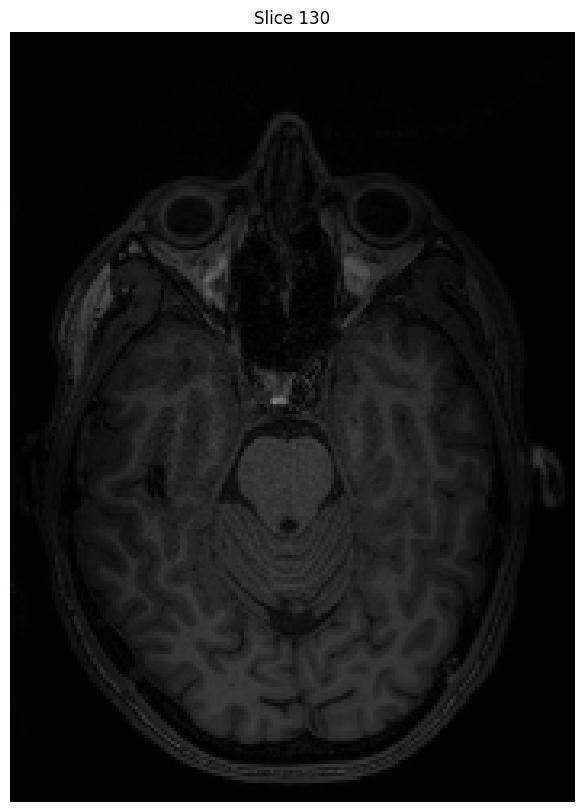

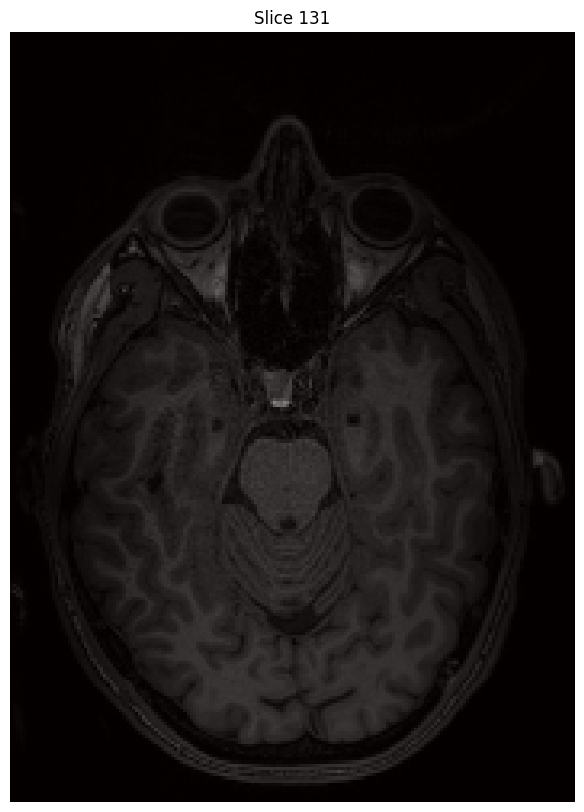

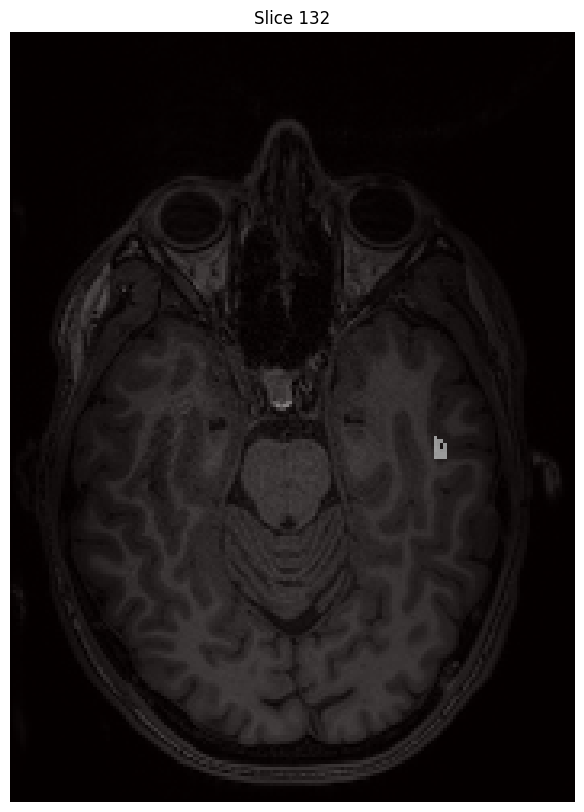

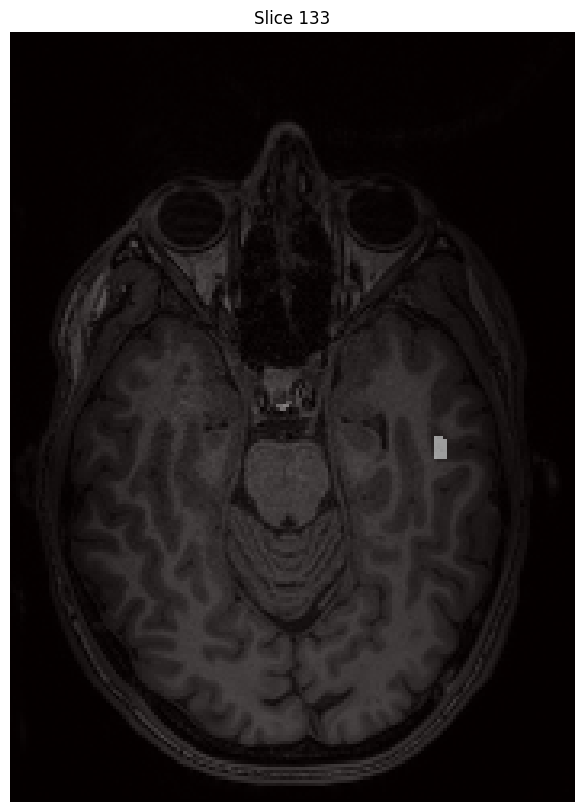

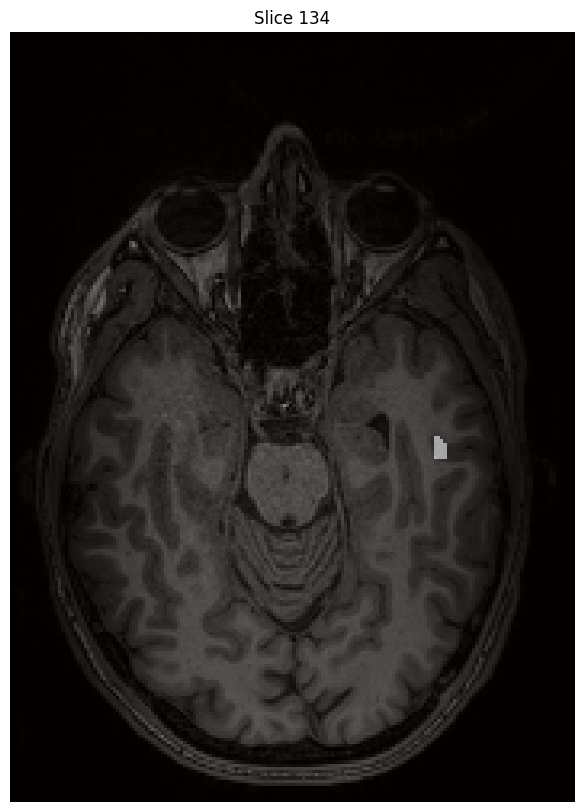

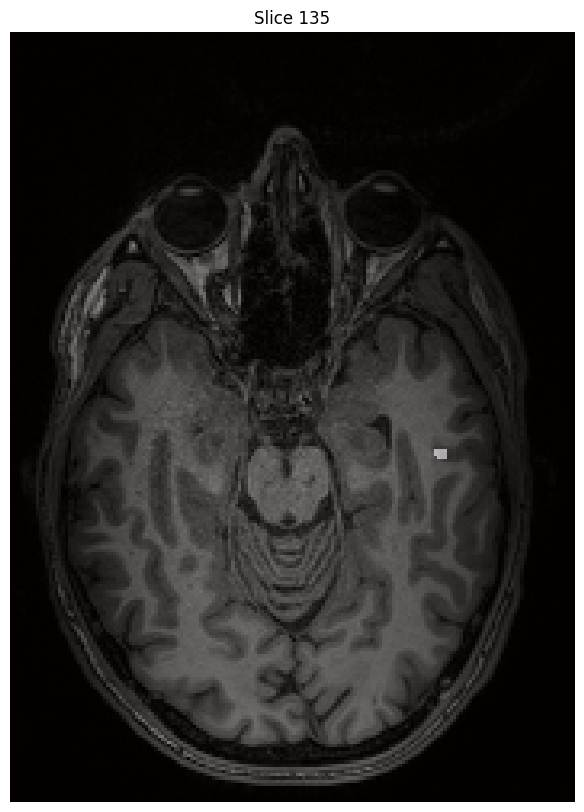

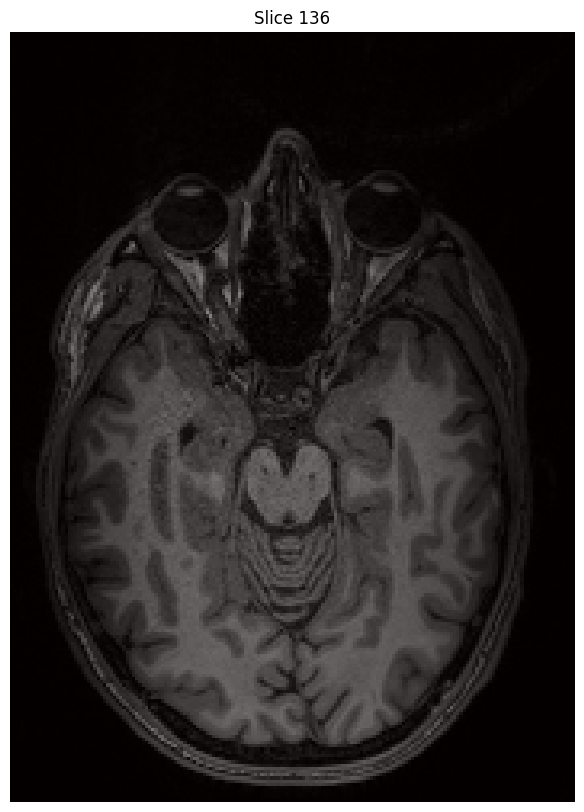

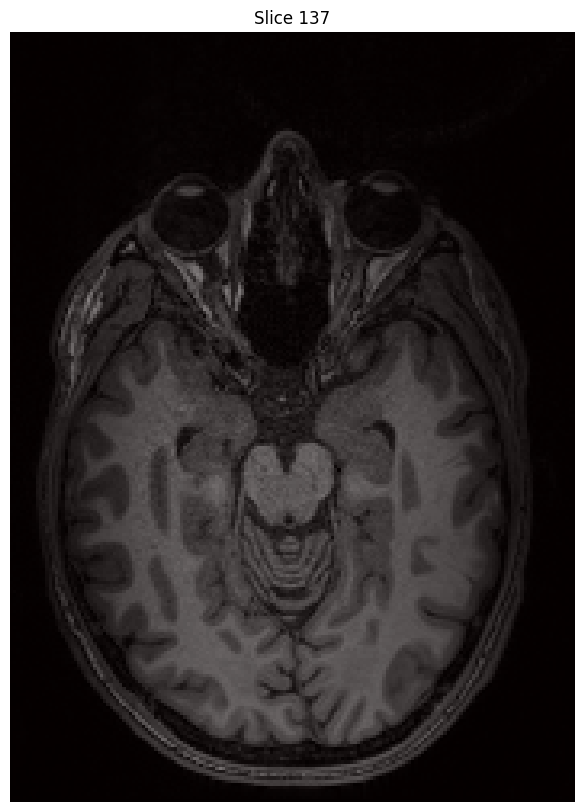

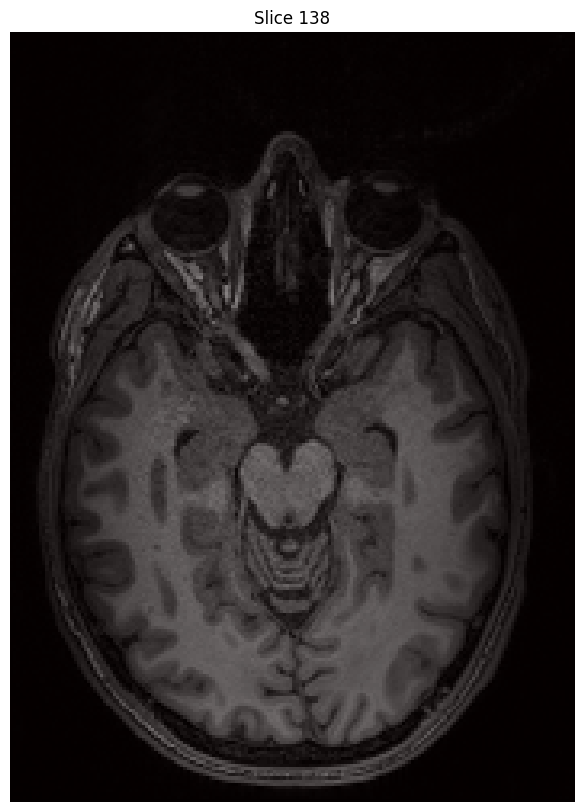

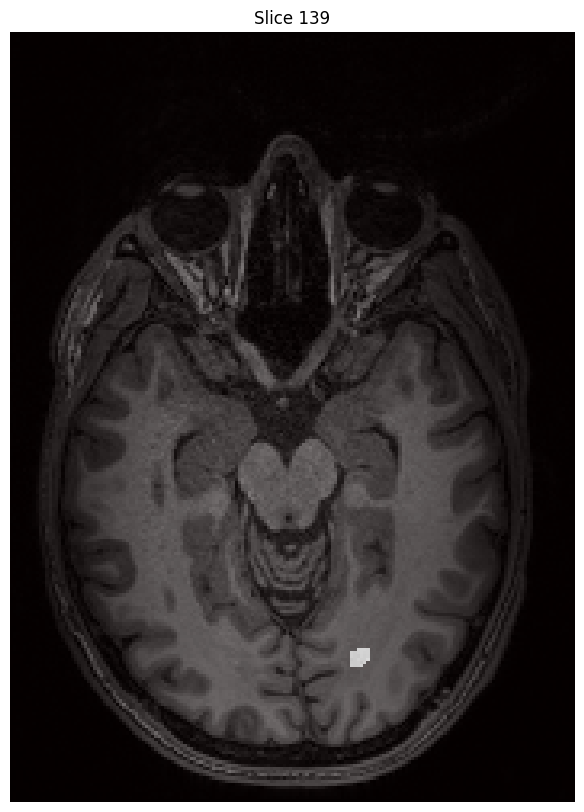

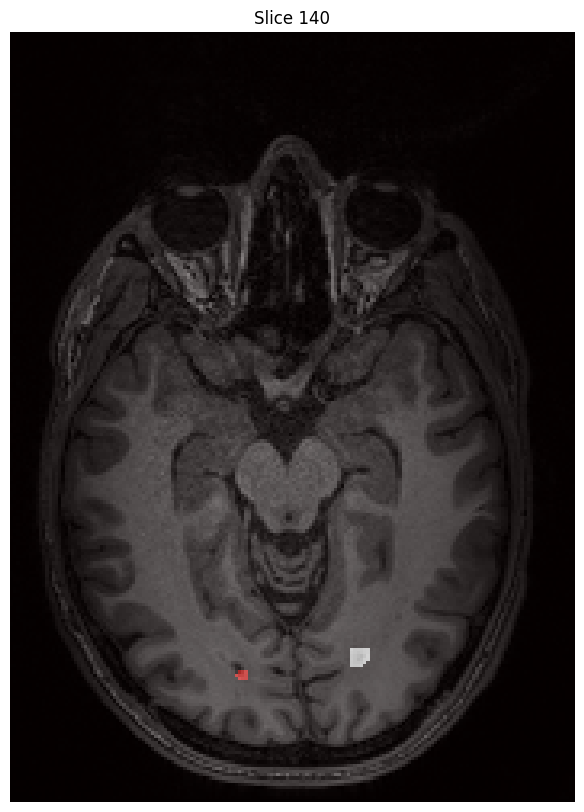

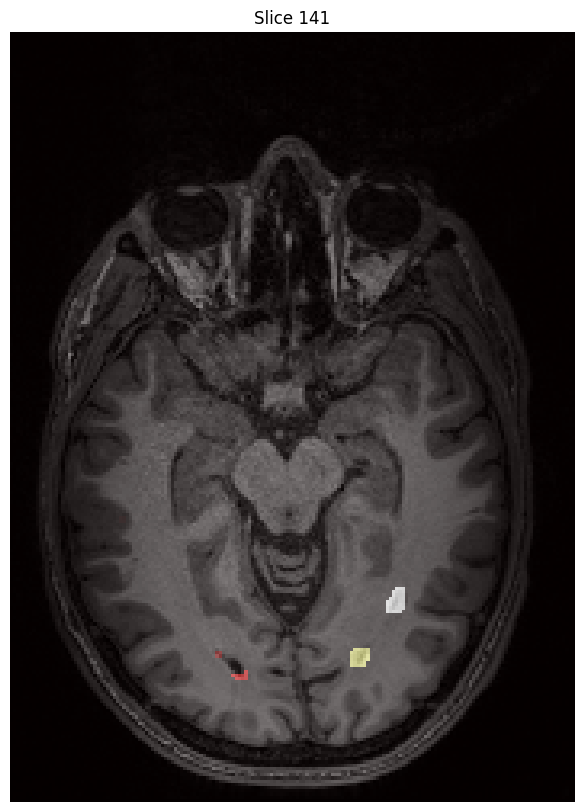

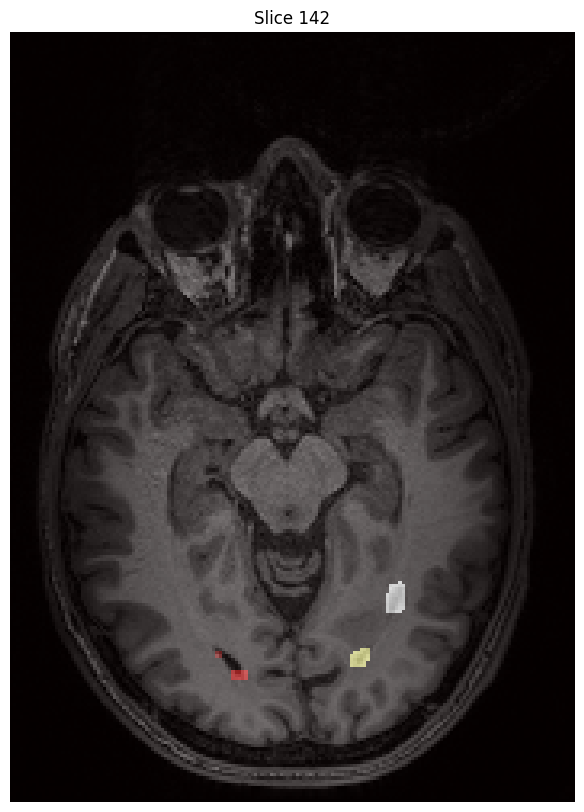

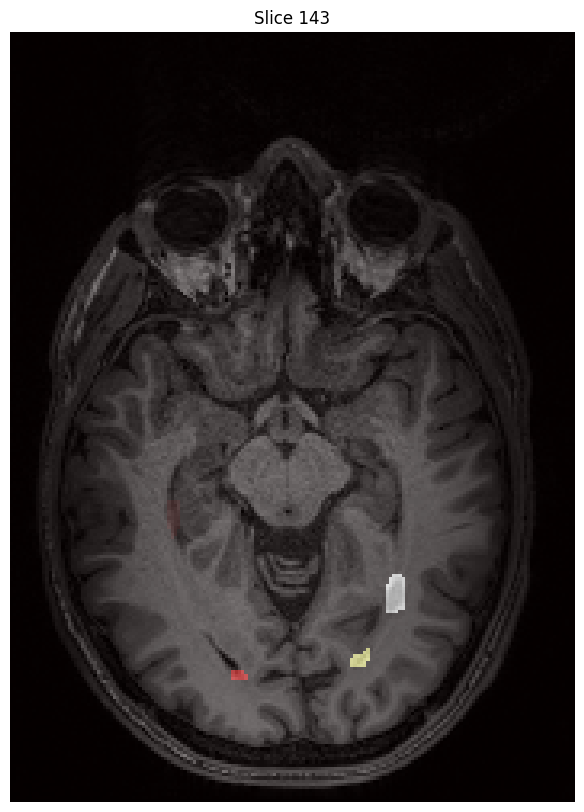

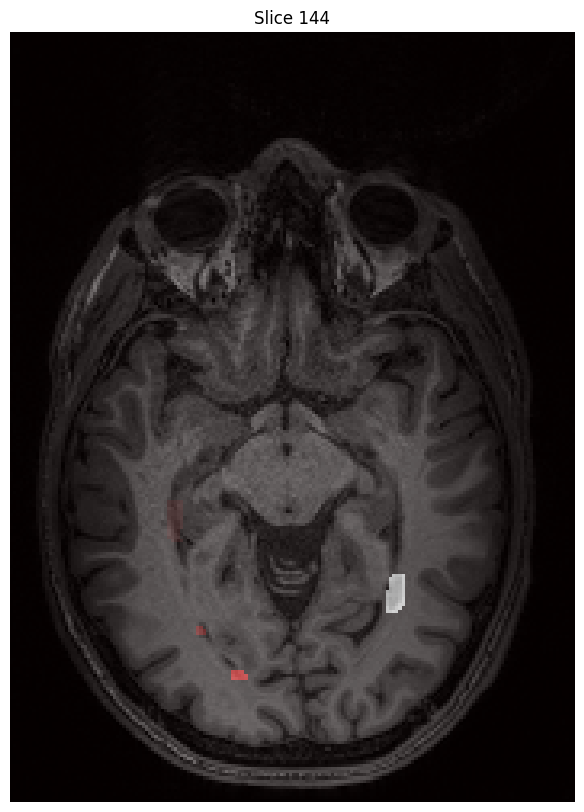

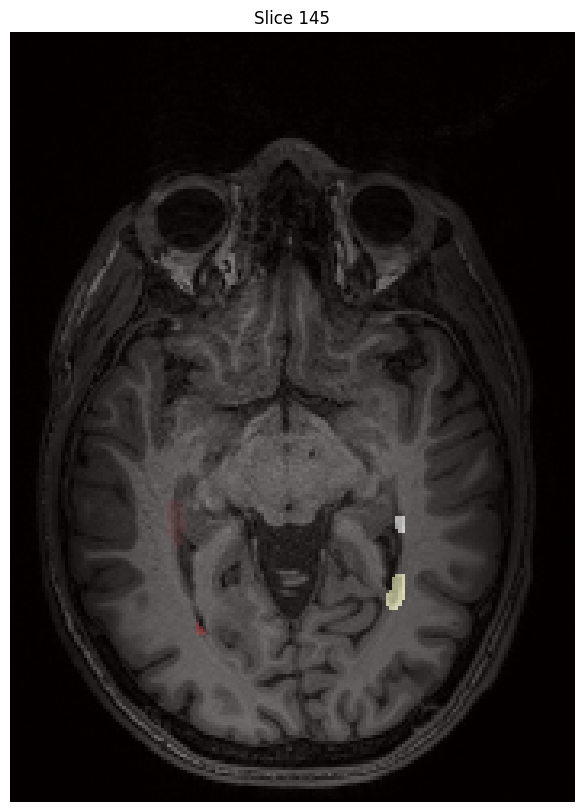

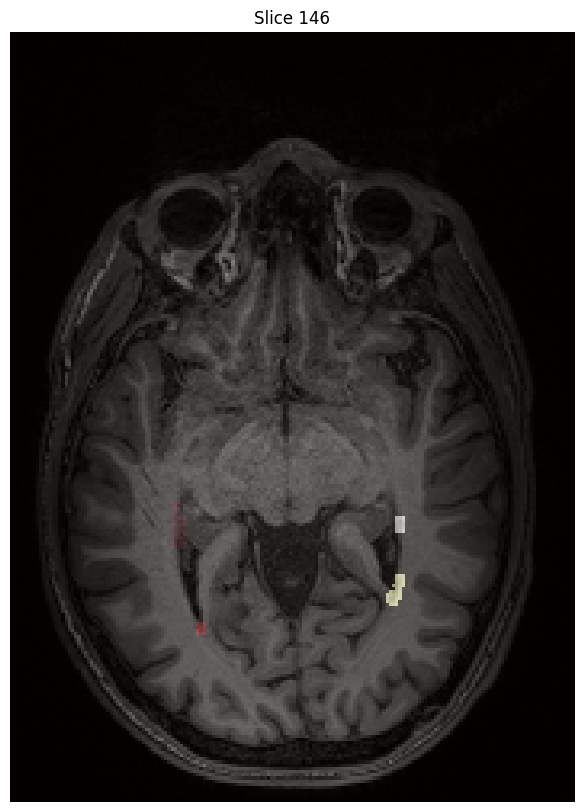

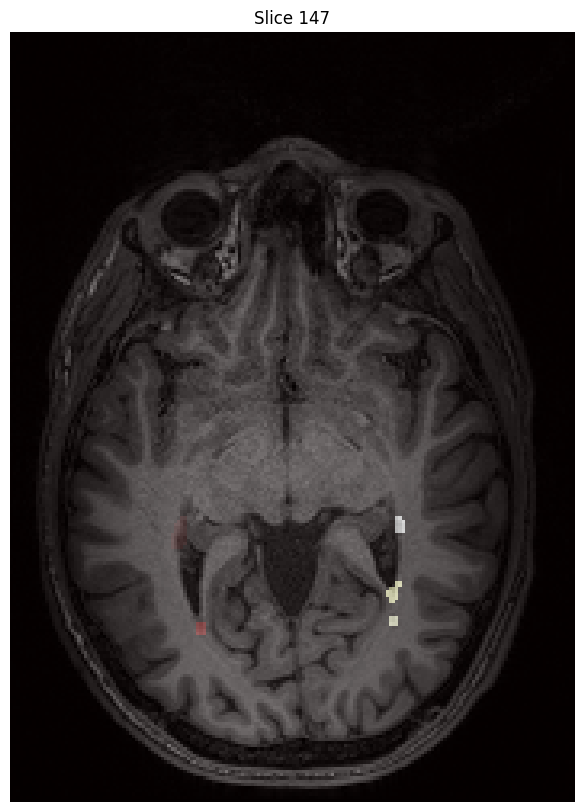

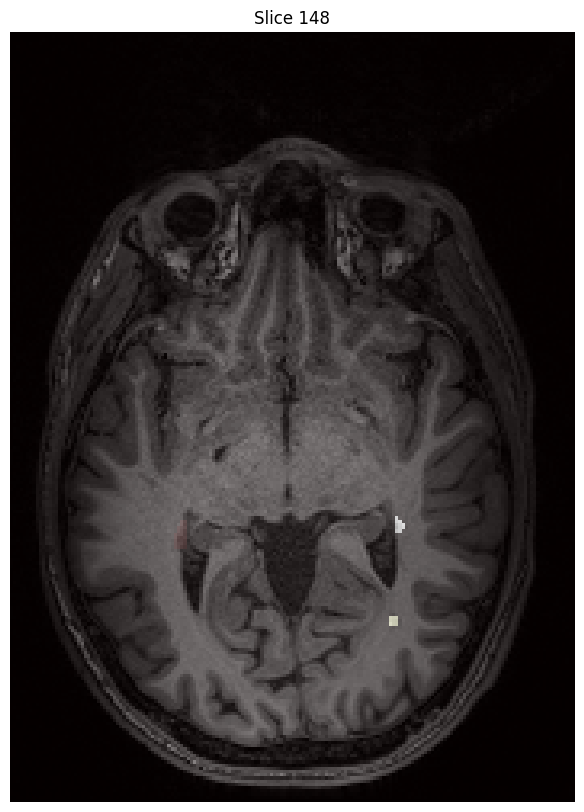

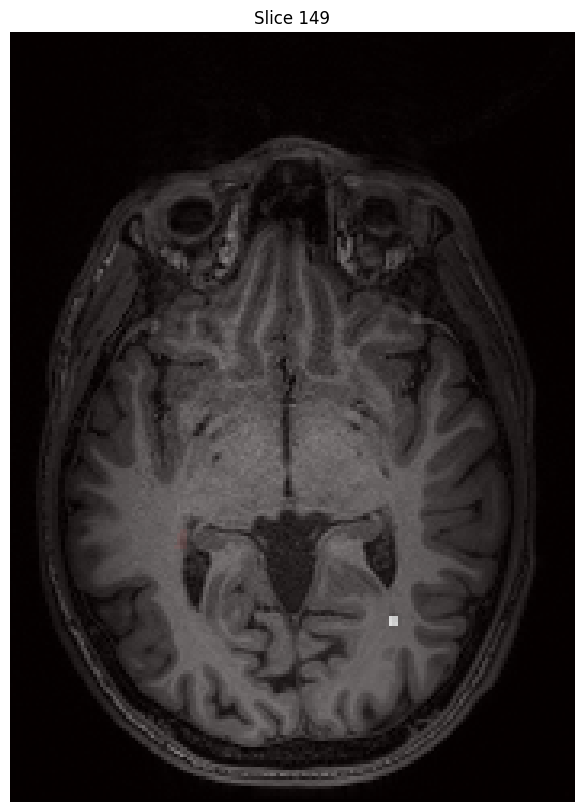

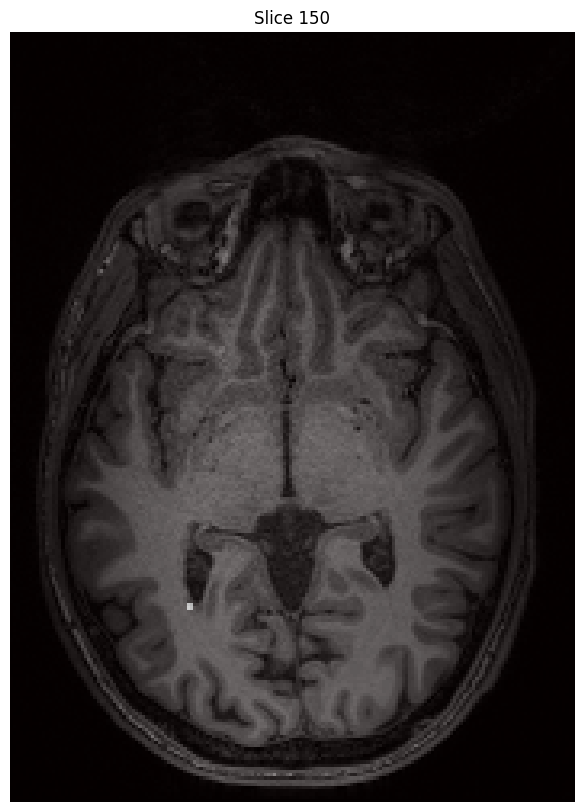

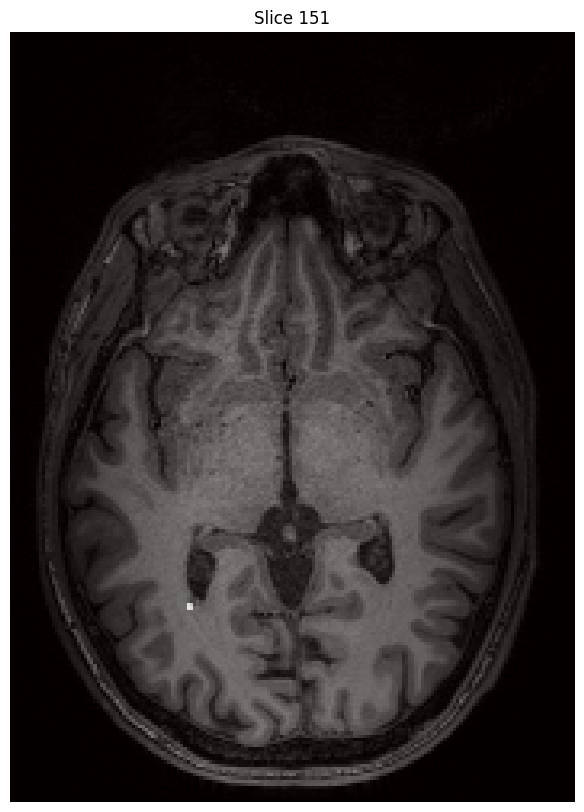

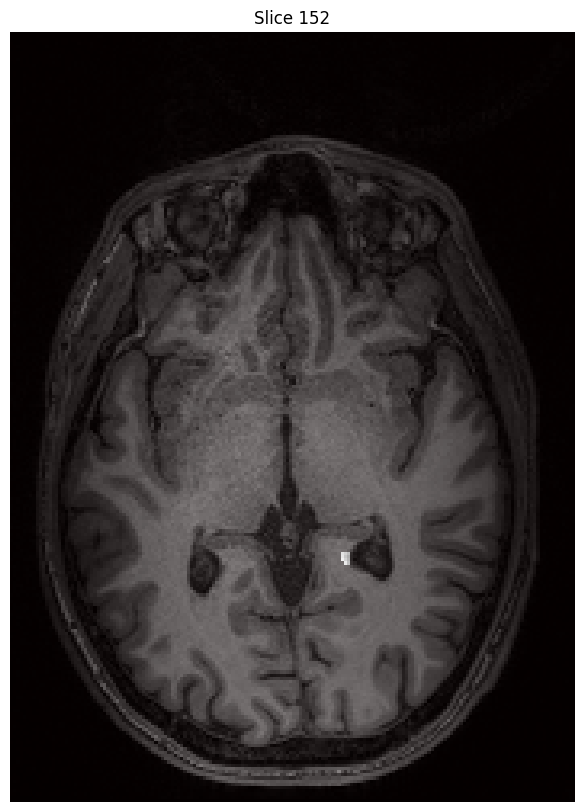

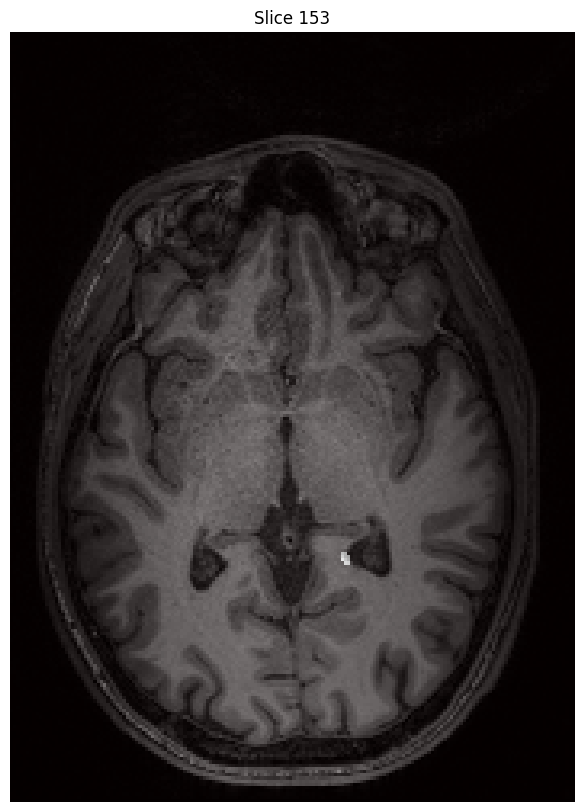

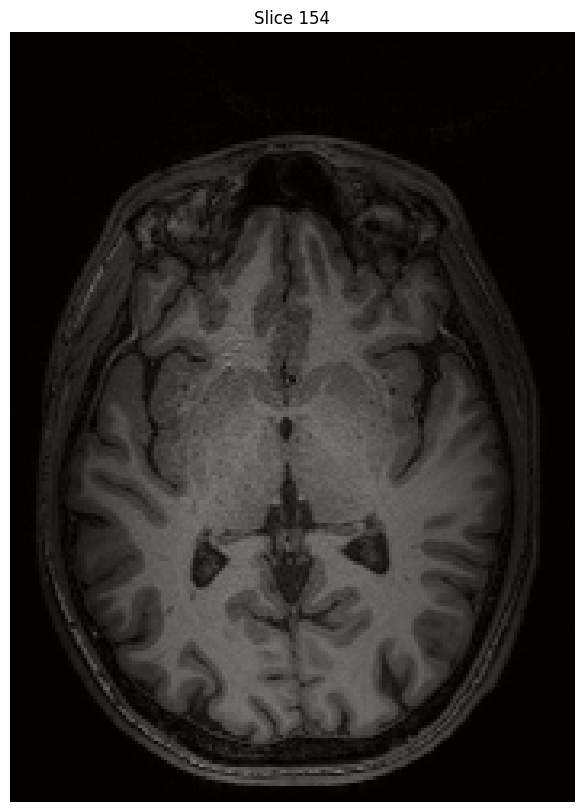

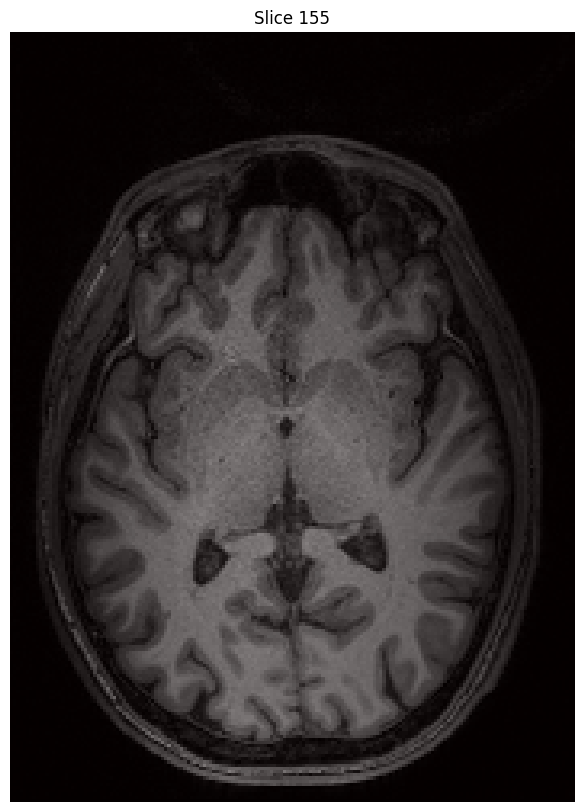

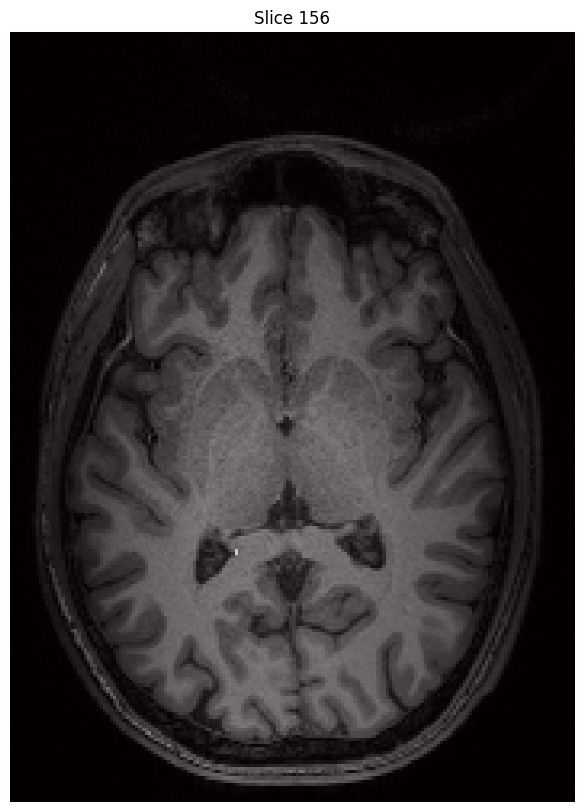

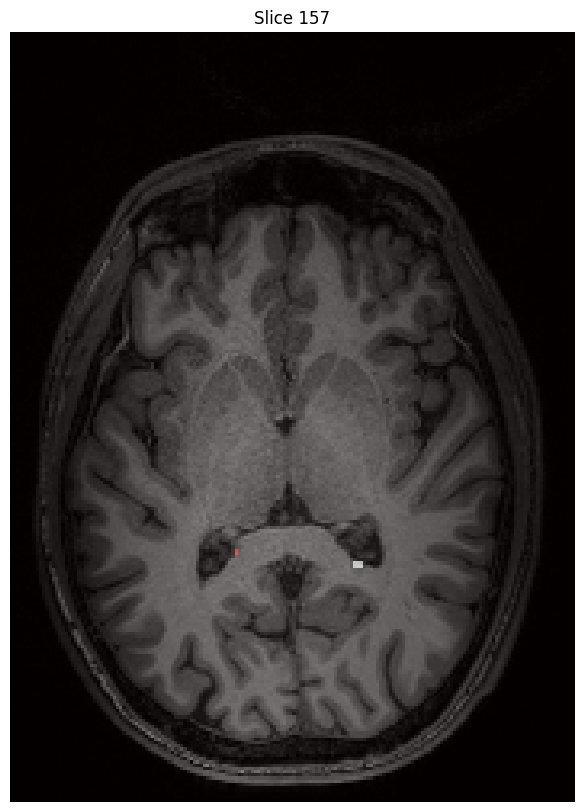

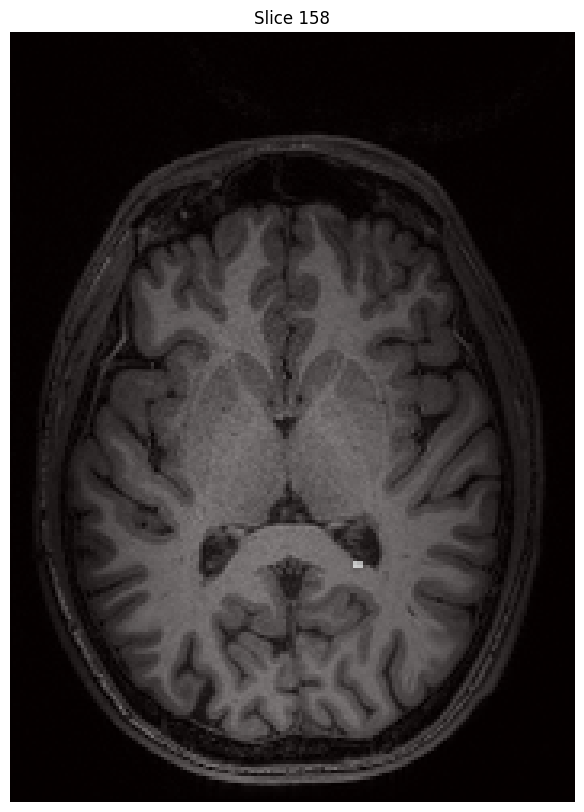

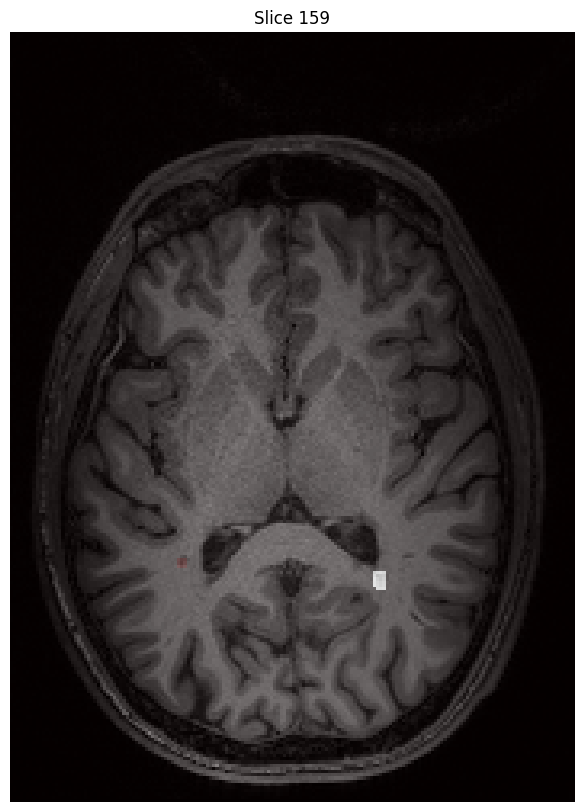

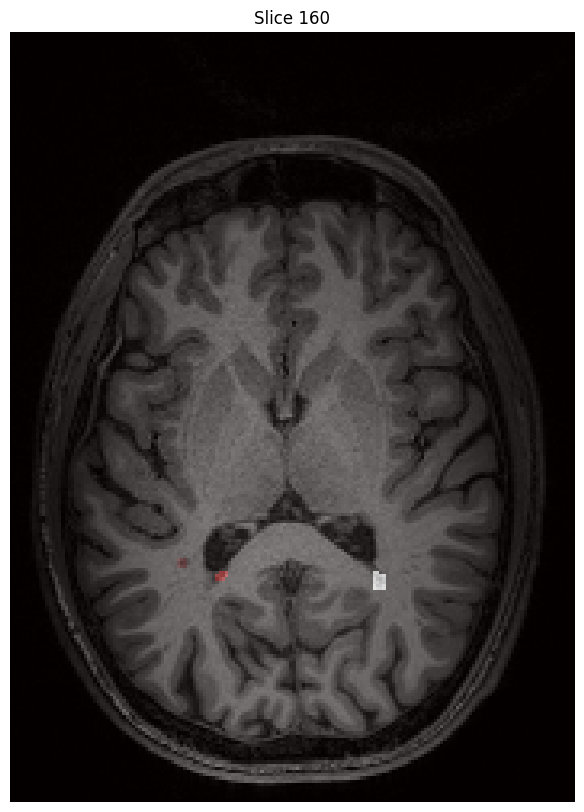

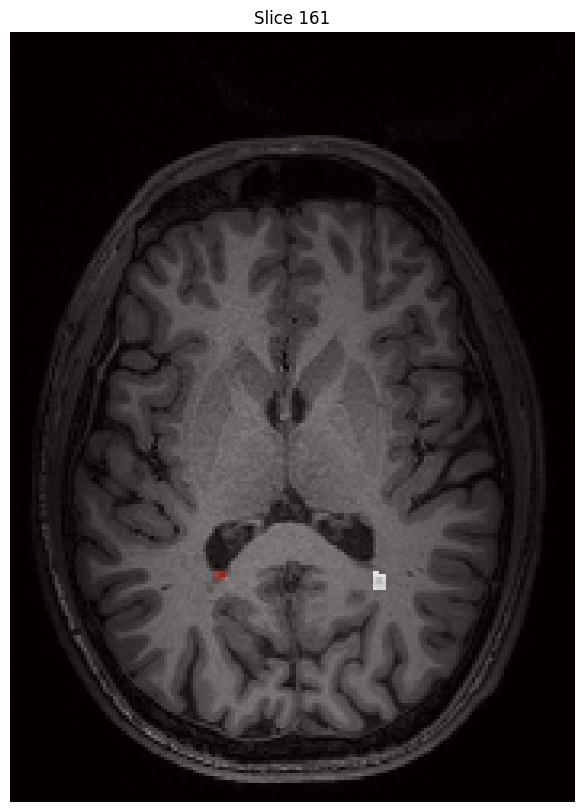

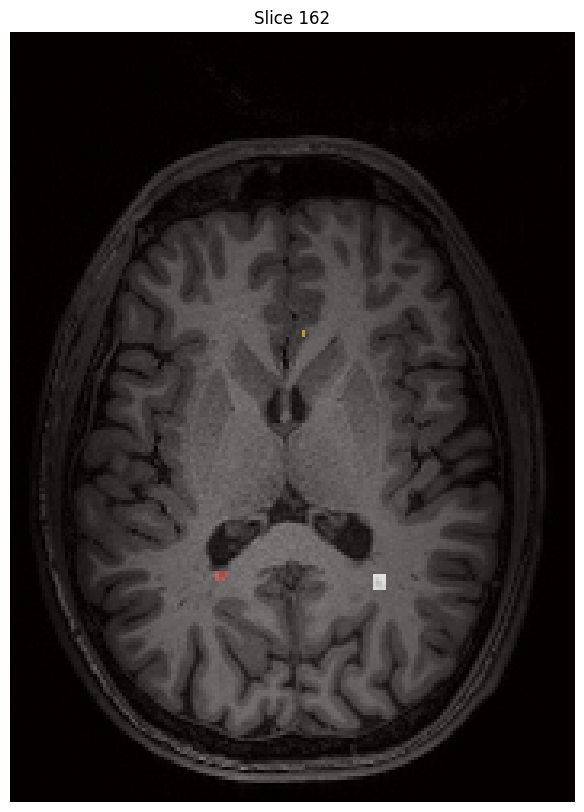

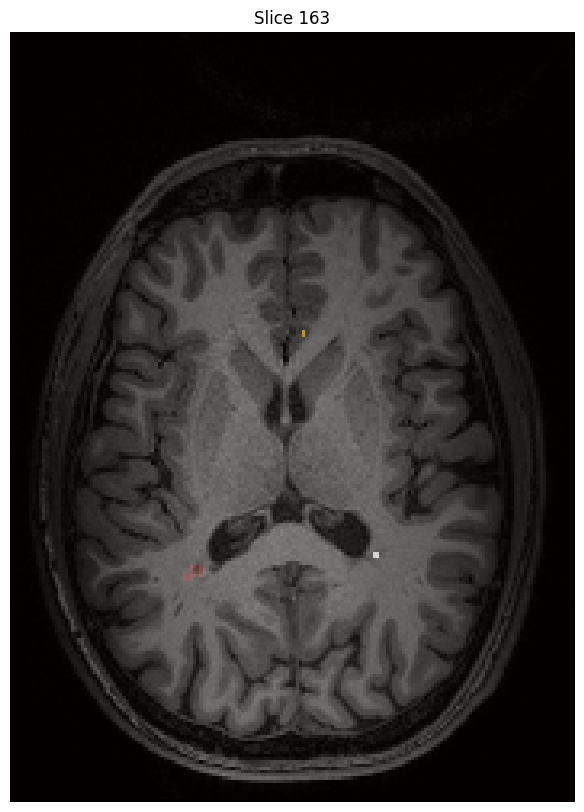

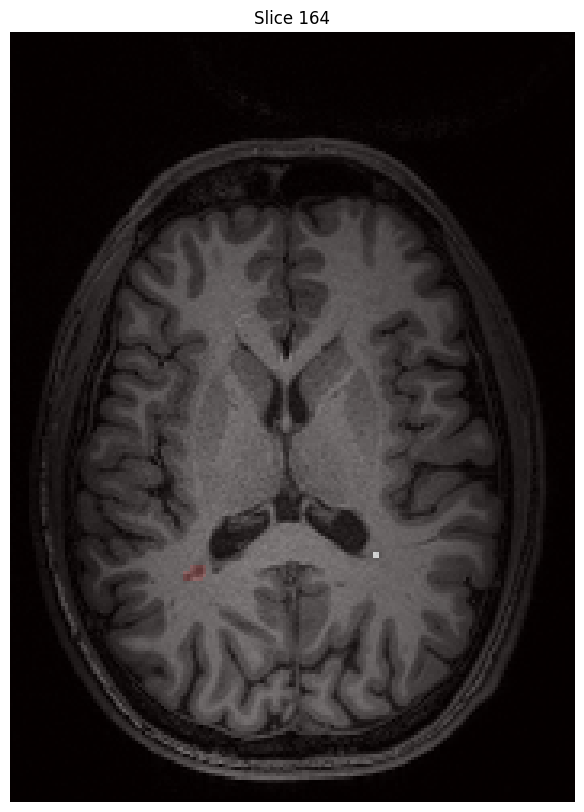

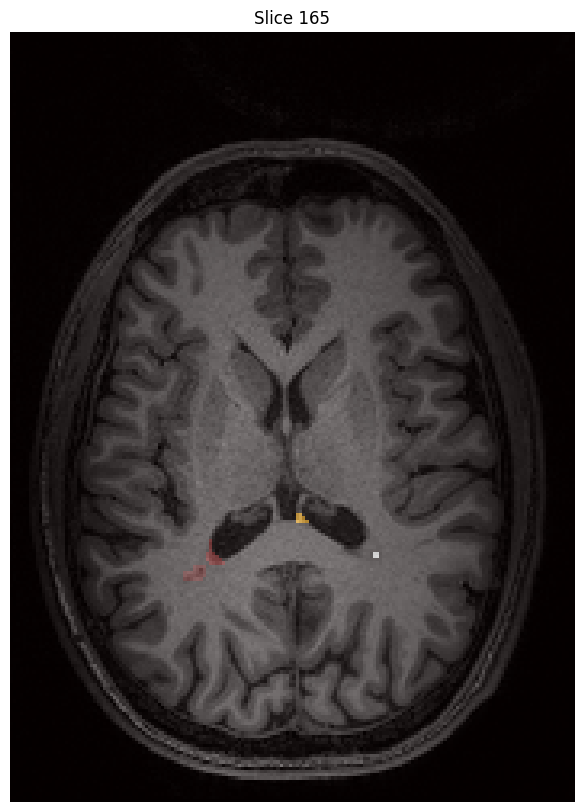

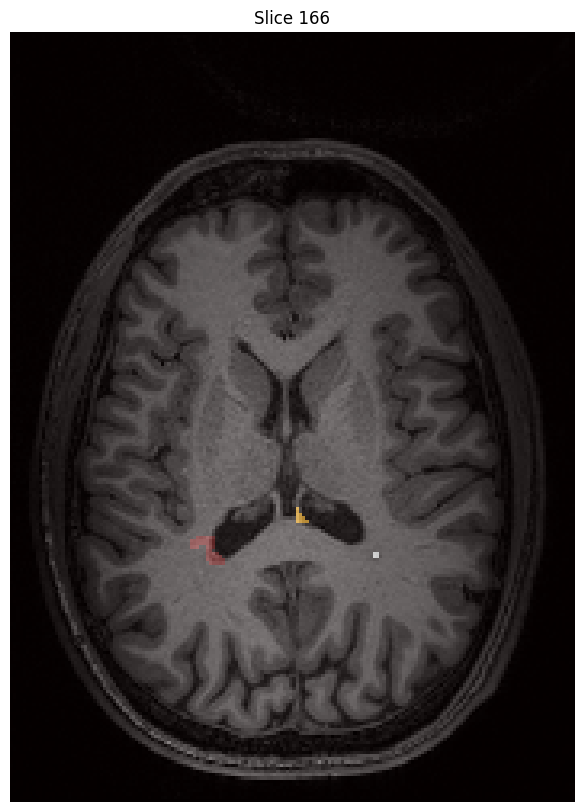

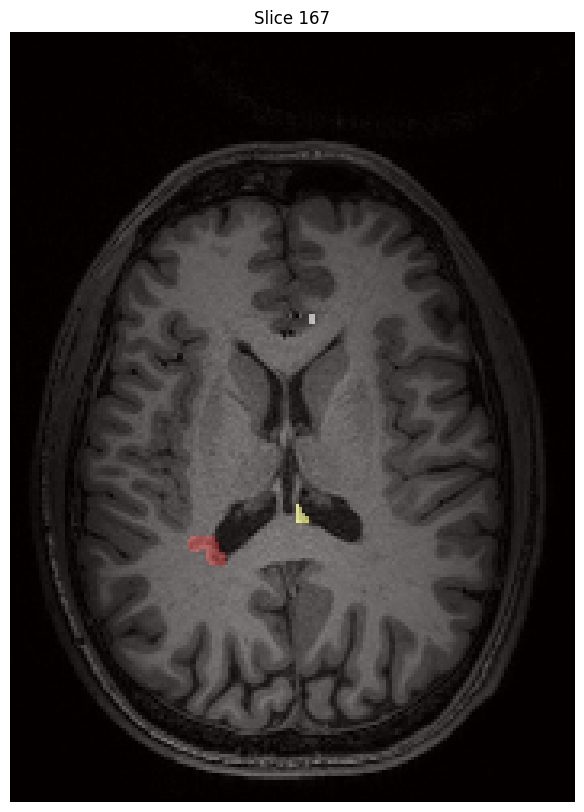

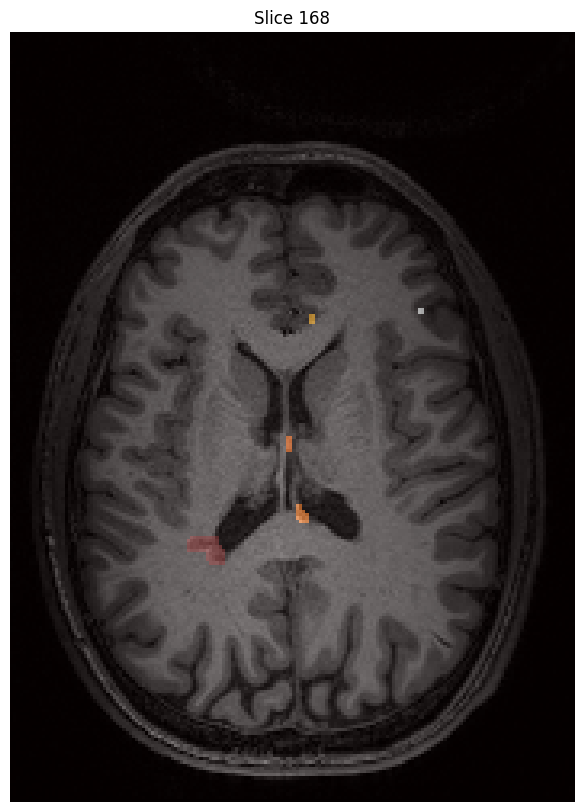

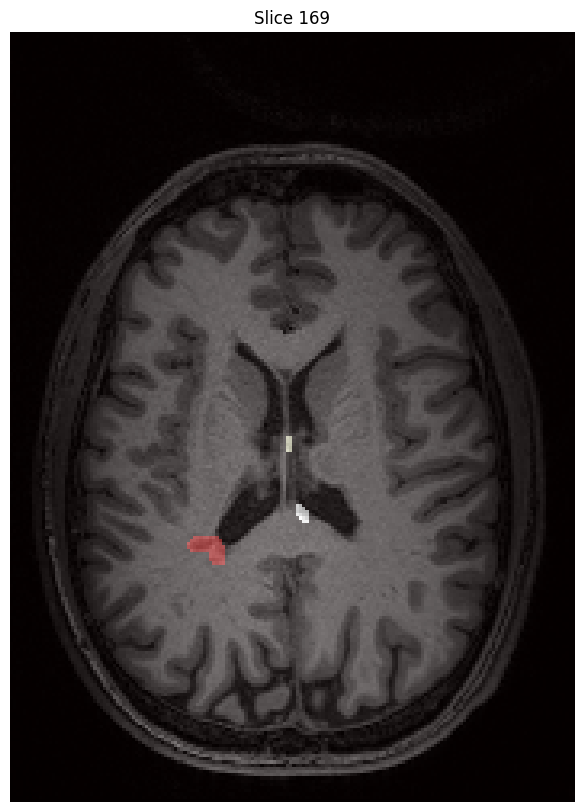

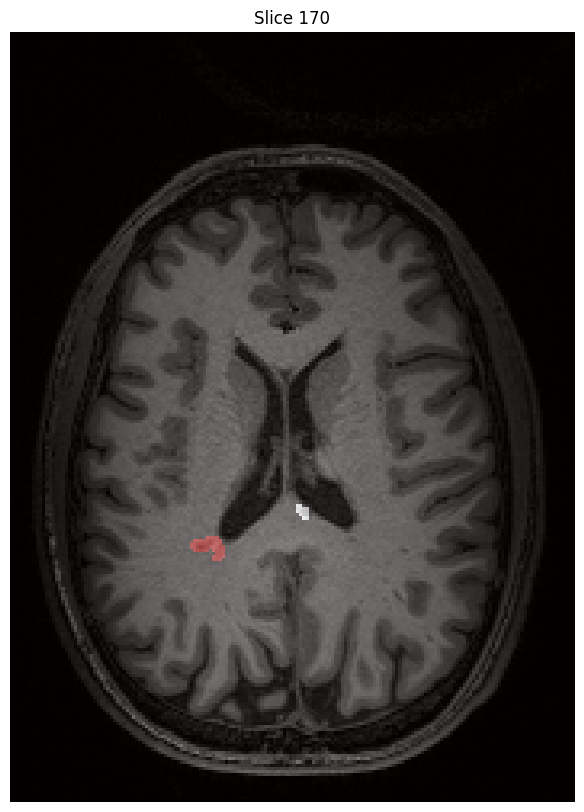

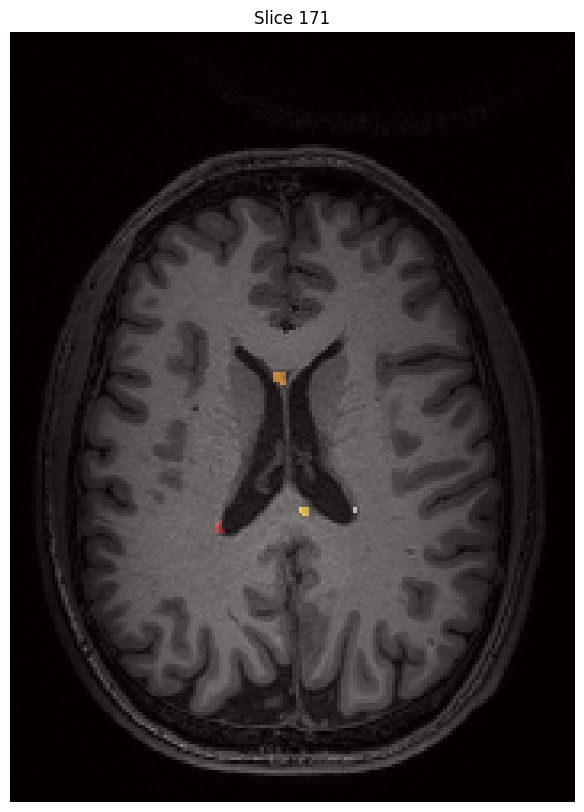

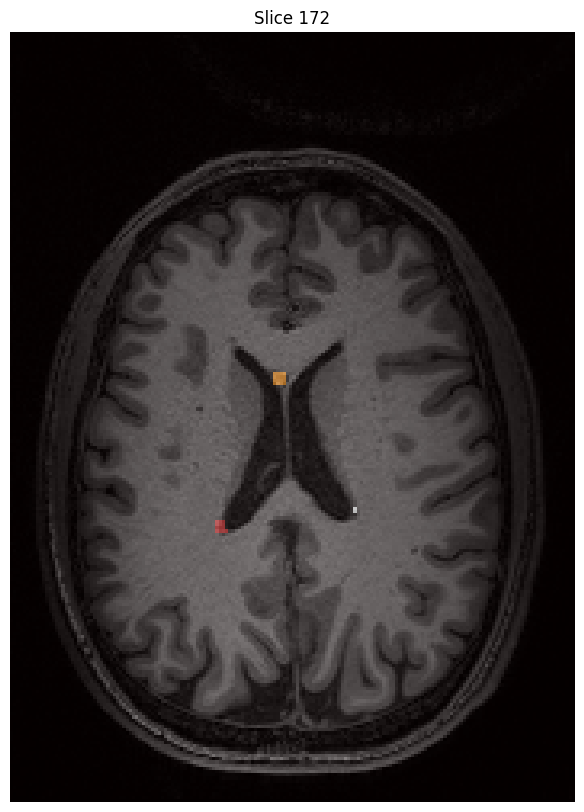

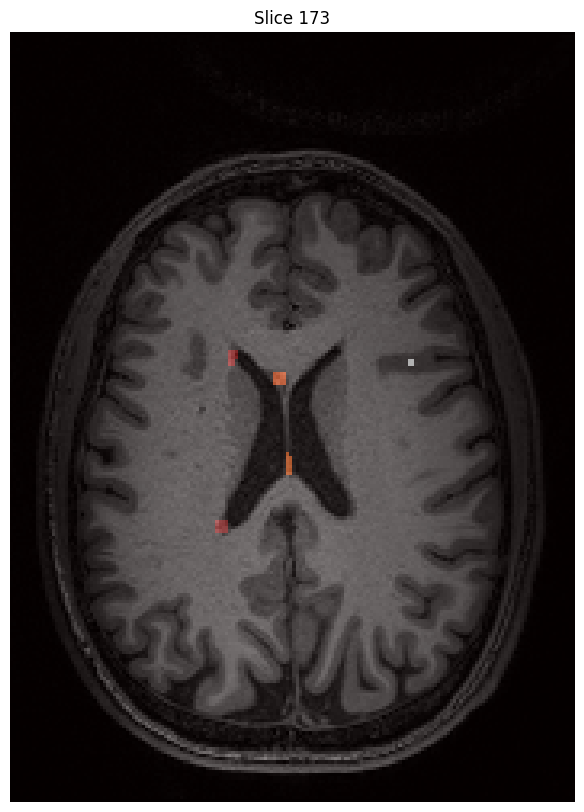

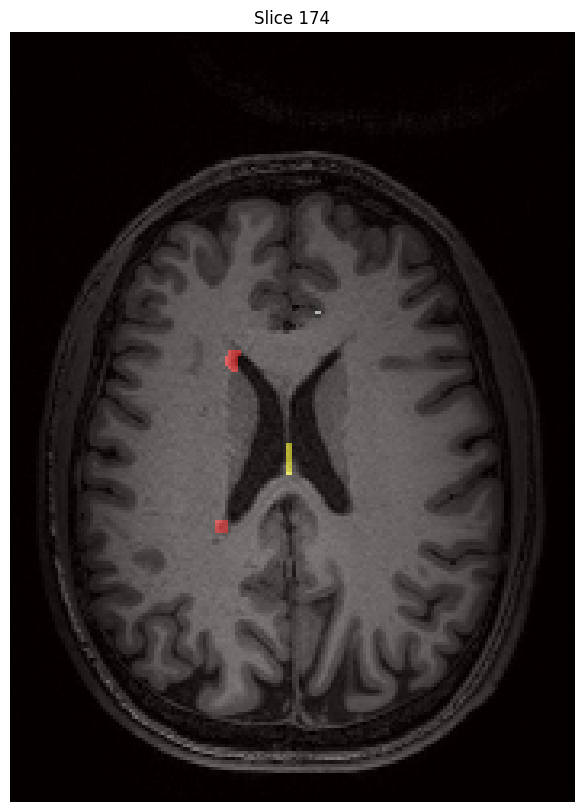

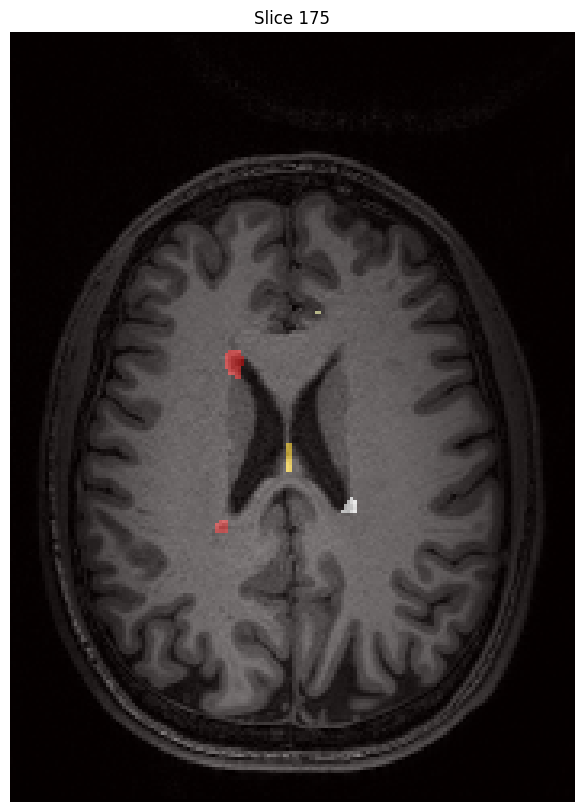

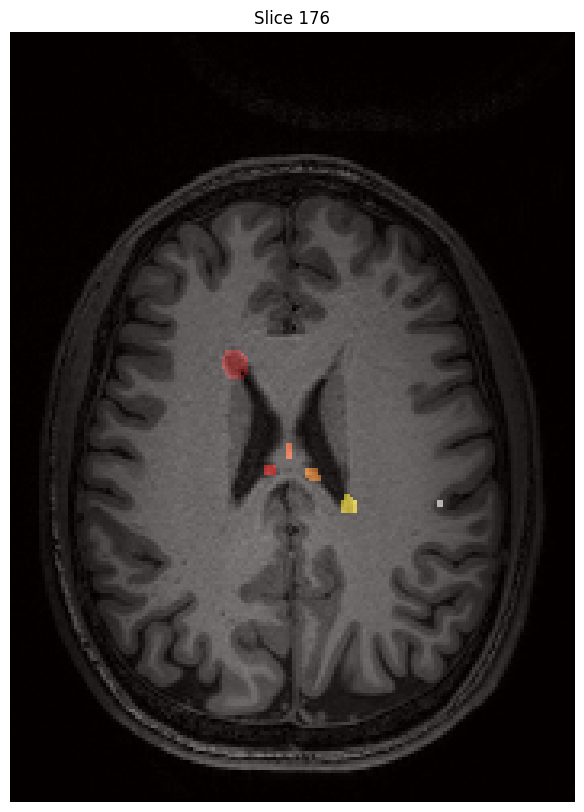

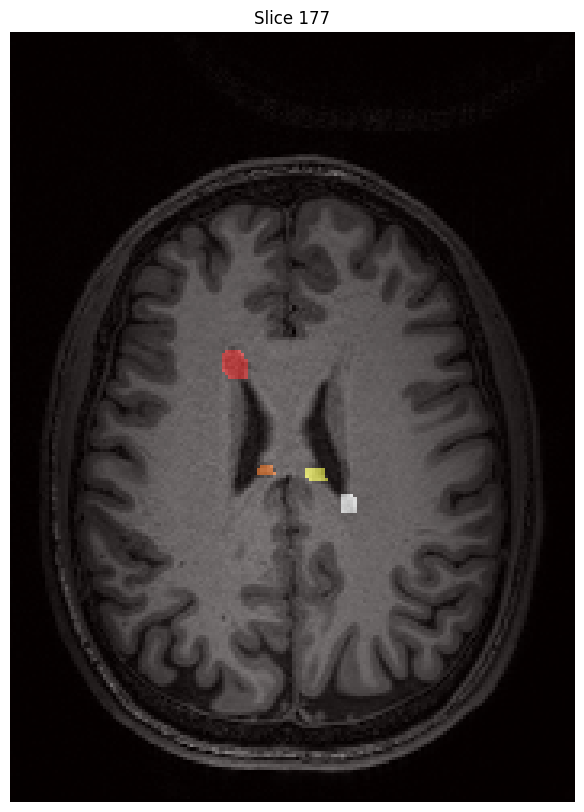

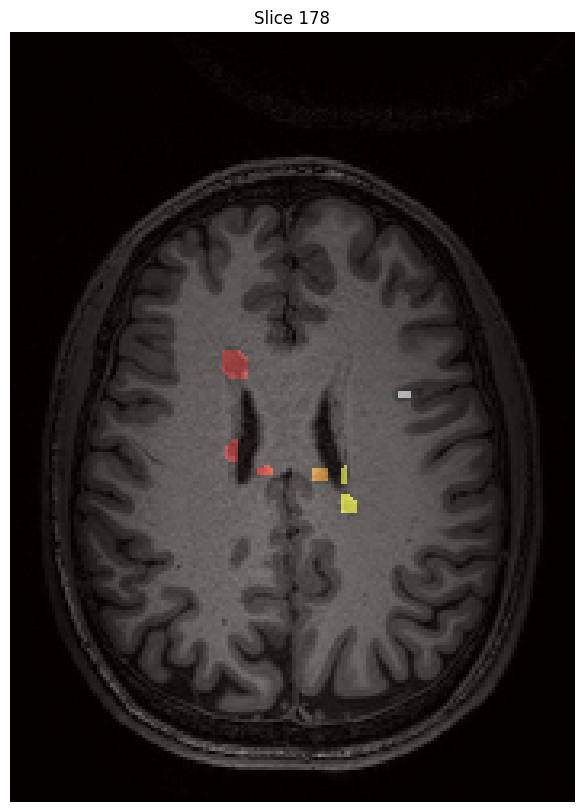

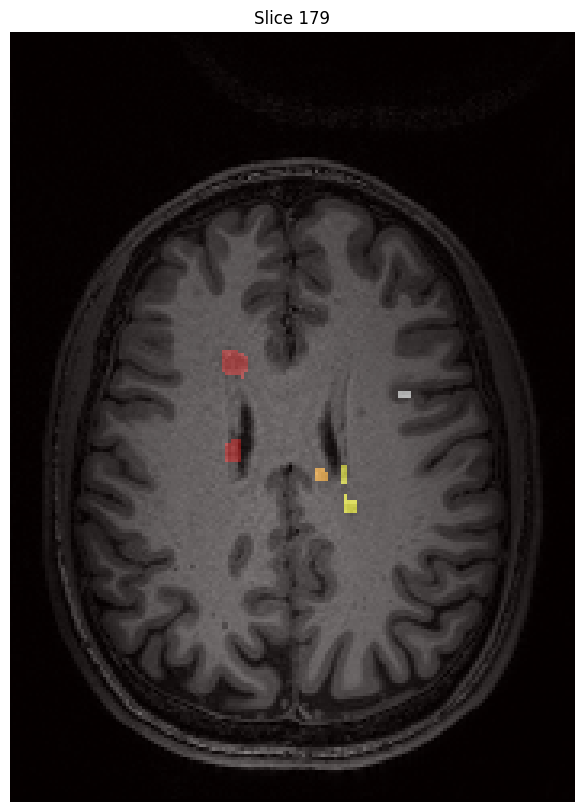

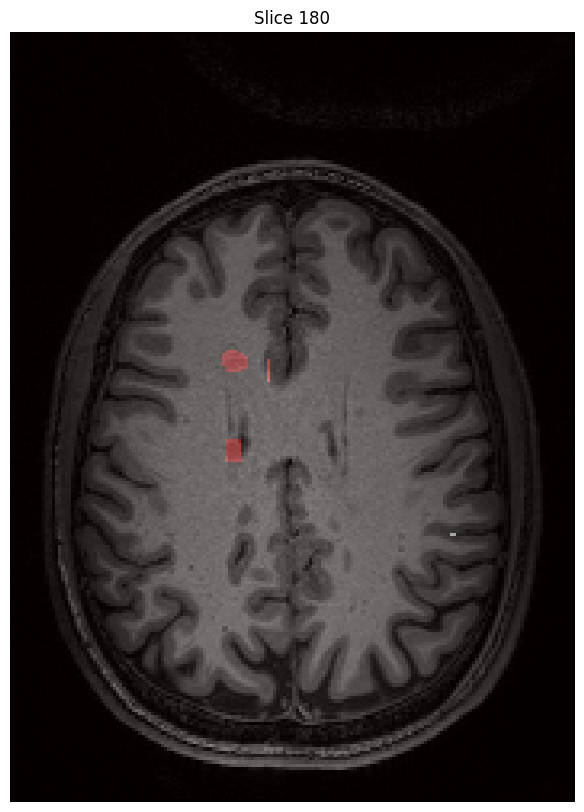

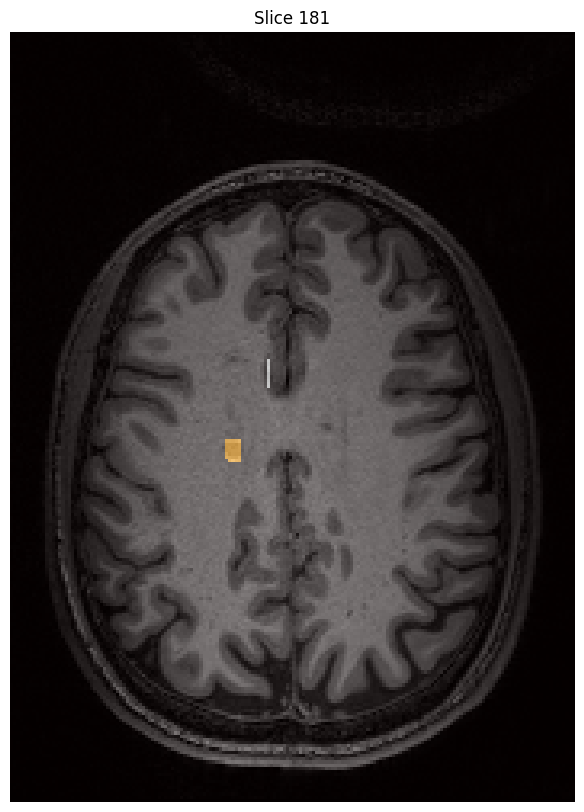

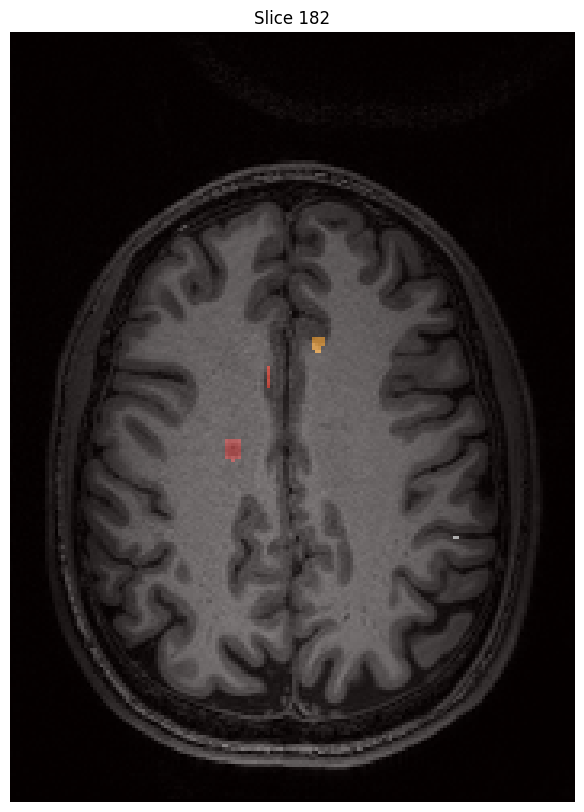

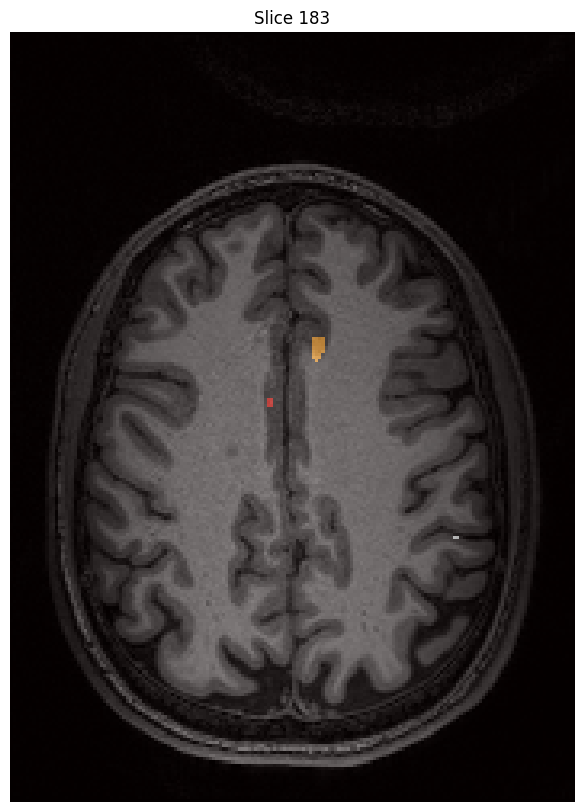

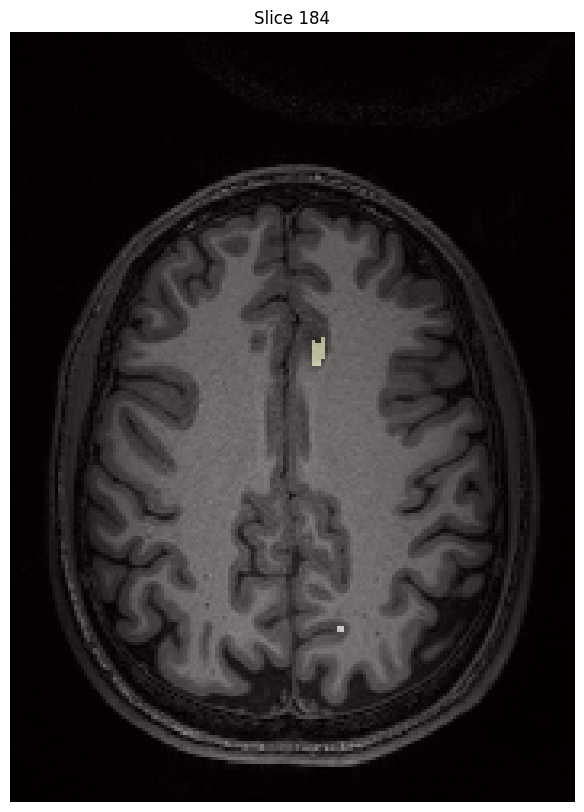

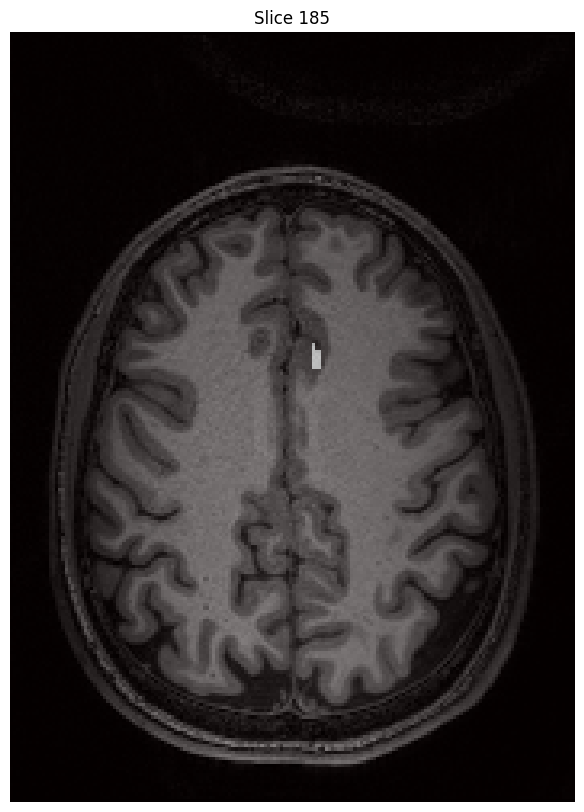

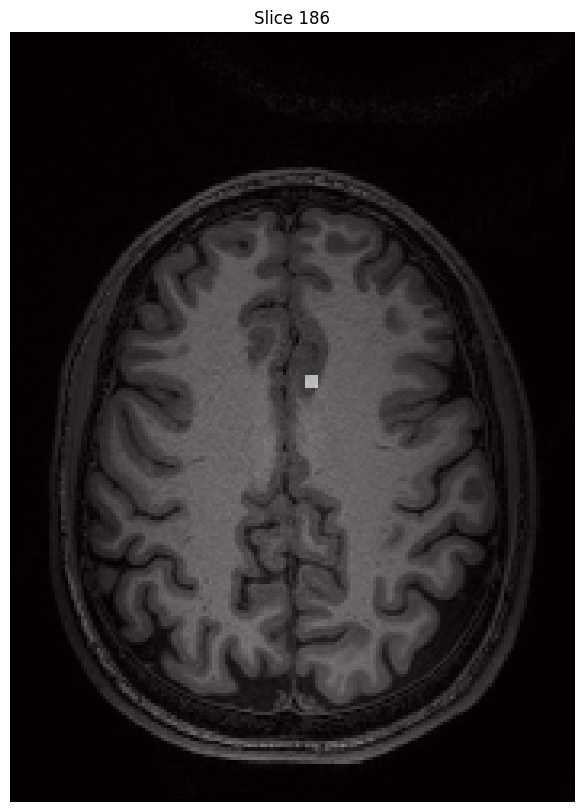

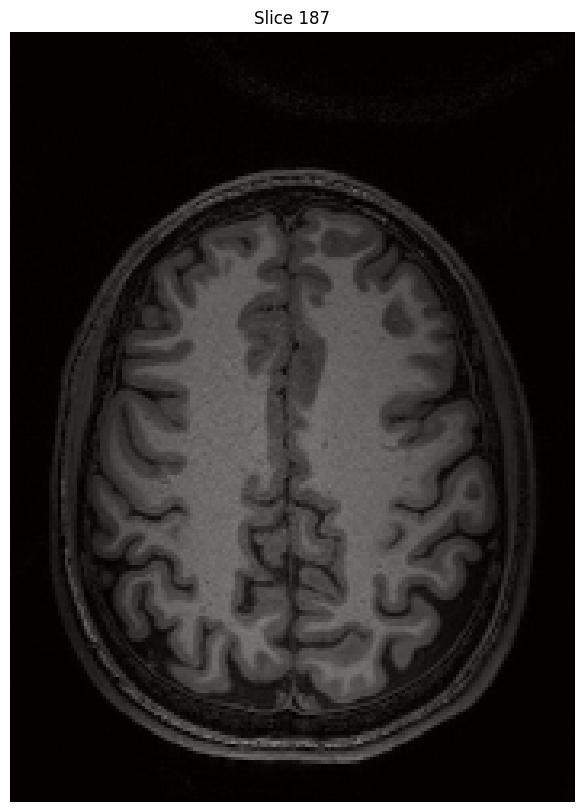

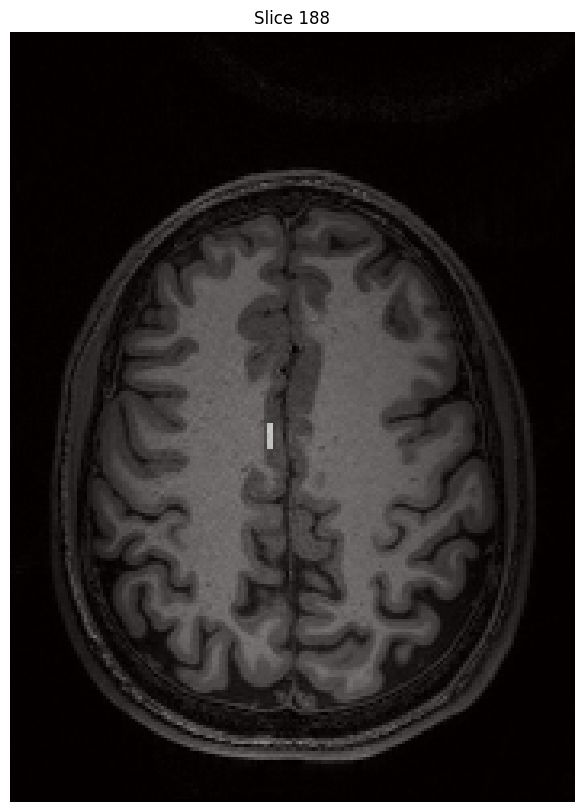

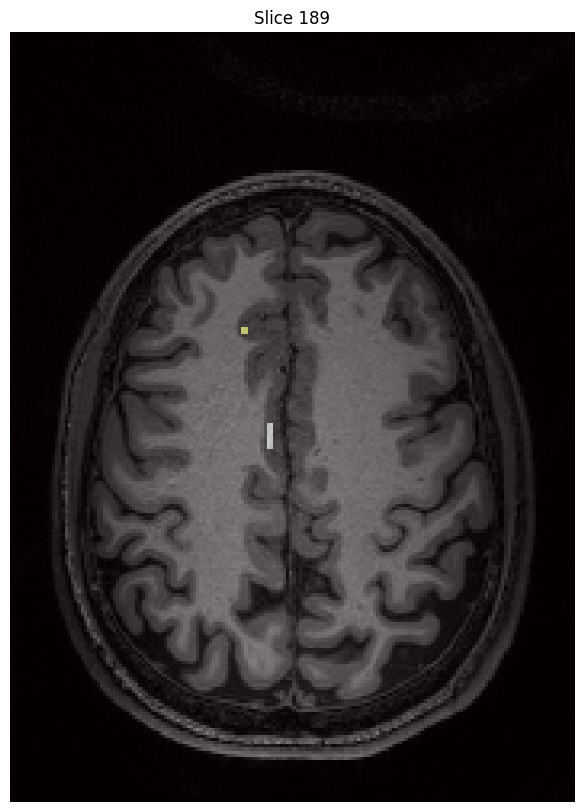

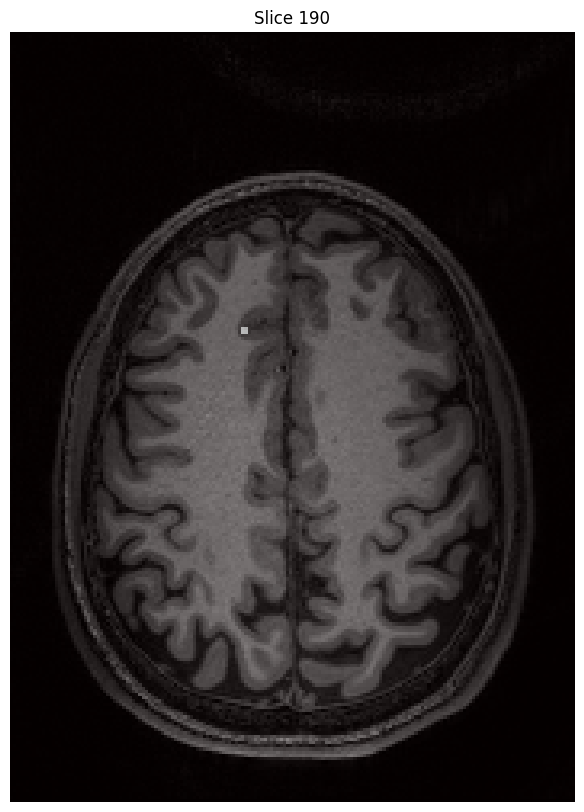

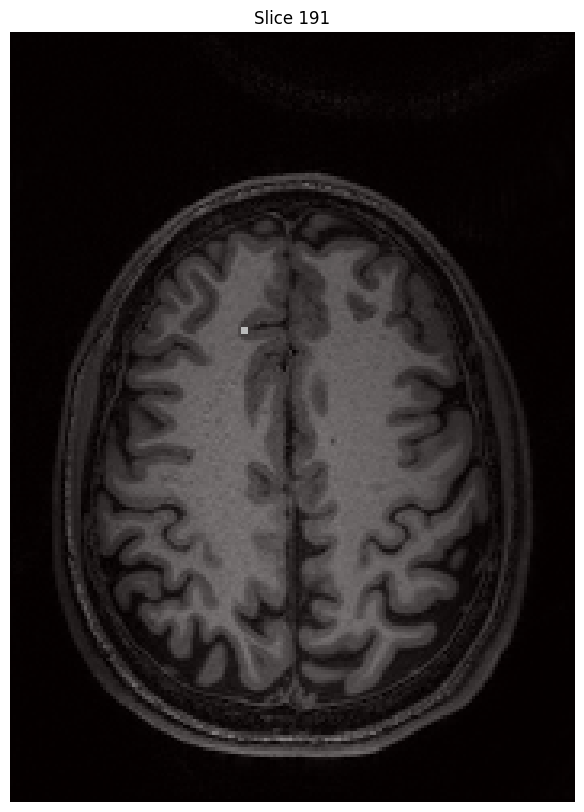

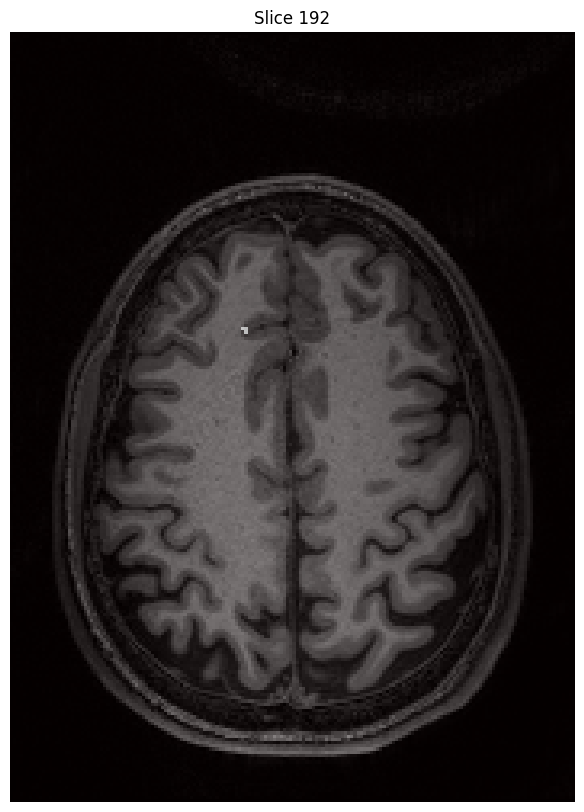

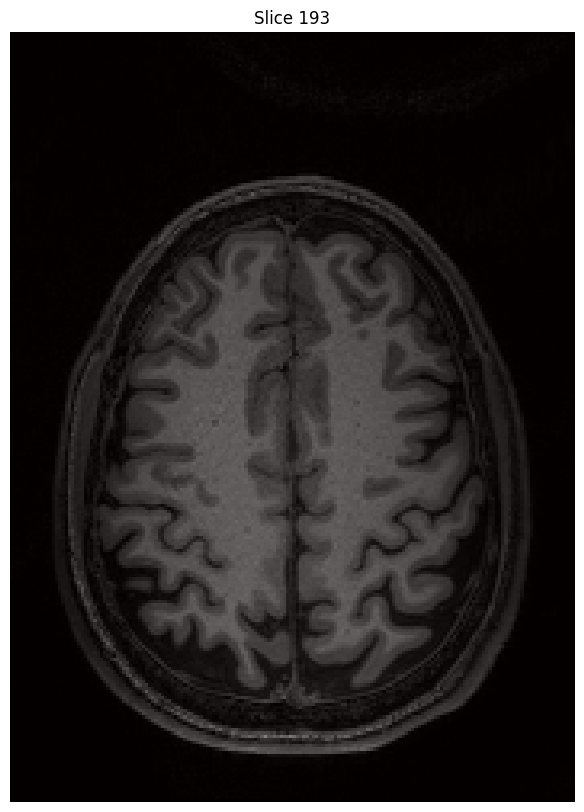

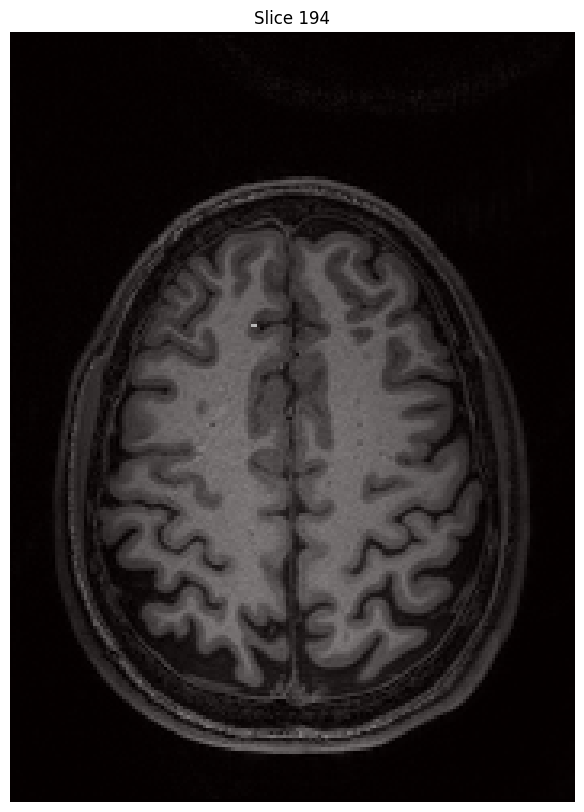

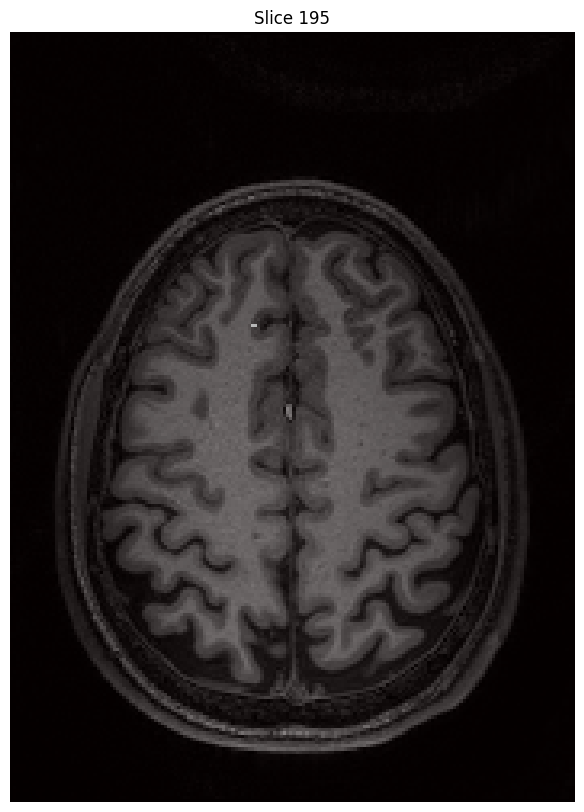

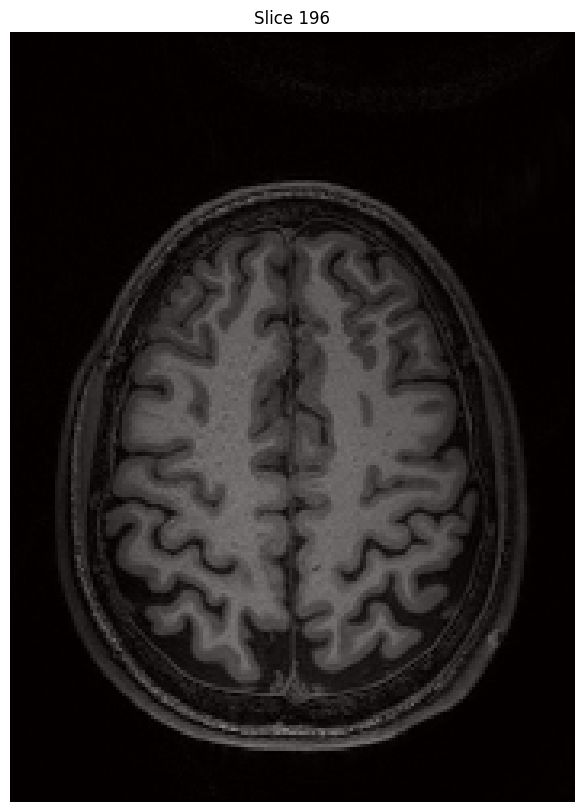

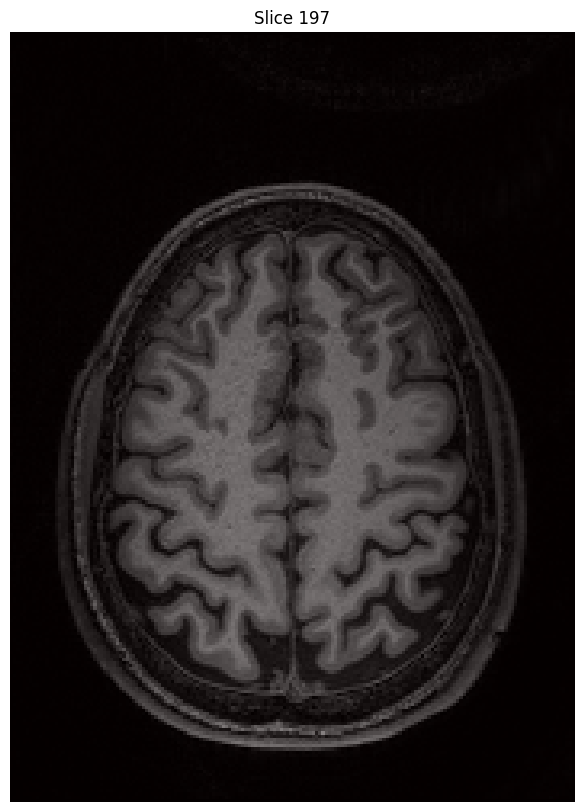

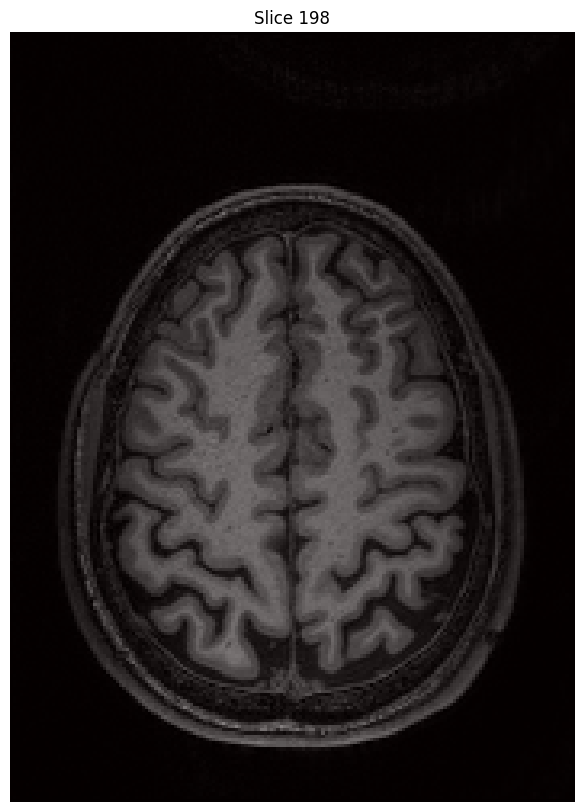

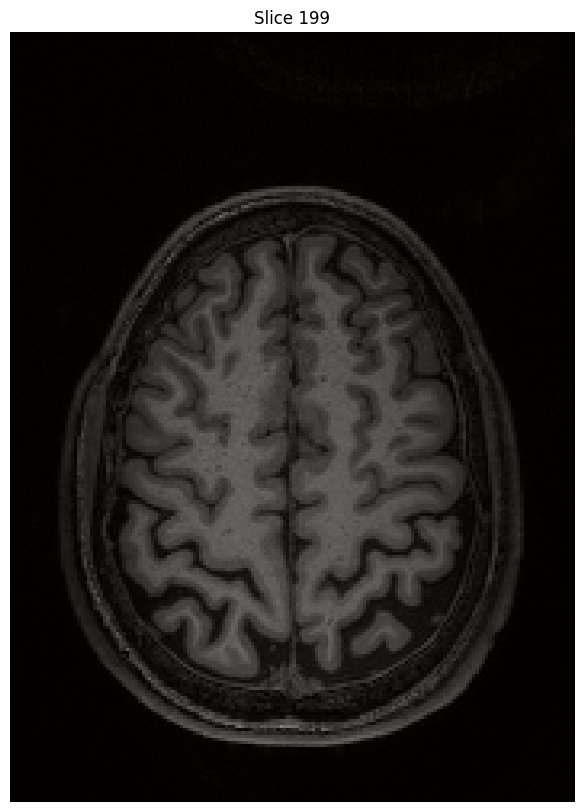

In [12]:
import matplotlib.pyplot as plt
import numpy as np

# Choose the slice index you want to visualize

for i in range(130,200):
    slice_index = i  # Change this to the slice you want to visualize

    # Extract the slice from the T1 images and lesions
    t1_slice = t1_imgs_data.get_fdata()[:, :, slice_index]
    lesions_slice = lesions_data.get_fdata()[:, :, slice_index]

    # Plot the T1 slice
    plt.figure(figsize=(10, 10))
    plt.imshow(t1_slice.T, cmap='gray', origin='lower')
    plt.imshow(lesions_slice.T, cmap='hot', alpha=0.5, origin='lower')  # Overlay the lesions with some transparency
    plt.title(f'Slice {slice_index}')
    plt.axis('off')
    plt.show()

# Lesion count

In [14]:

# Load the lesions data
lesions_data = nib.load(lesions)
lesions_array = lesions_data.get_fdata()

# Get the unique values and their counts
unique_labels, counts = np.unique(lesions_array, return_counts=True)

# Print the unique labels and their counts
print("Unique labels and their counts:")
for label, count in zip(unique_labels, counts):
    if label == 0.0:
        continue
    print(f"Label: {label}, Count: {count}")

# Check if the labels are in a certain order
is_ordered = np.all(np.diff(unique_labels) > 0) # np.diff counts diff between elements, then check if it's positive, then check if all are positive
print("Labels are in order:", is_ordered)

Unique labels and their counts:
Label: 1.0, Count: 4
Label: 2.0, Count: 328
Label: 3.0, Count: 18
Label: 4.0, Count: 82
Label: 5.0, Count: 8
Label: 6.0, Count: 337
Label: 7.0, Count: 41
Label: 8.0, Count: 8
Label: 9.0, Count: 33
Label: 10.0, Count: 68
Label: 11.0, Count: 377
Label: 12.0, Count: 157
Label: 13.0, Count: 63
Label: 14.0, Count: 4
Label: 15.0, Count: 15
Label: 16.0, Count: 4
Label: 17.0, Count: 39
Label: 18.0, Count: 32
Label: 19.0, Count: 6
Label: 20.0, Count: 23
Label: 21.0, Count: 46
Label: 22.0, Count: 61
Label: 23.0, Count: 20
Label: 24.0, Count: 95
Label: 25.0, Count: 4
Label: 26.0, Count: 76
Label: 27.0, Count: 16
Label: 28.0, Count: 12
Label: 29.0, Count: 93
Label: 30.0, Count: 4
Label: 31.0, Count: 4
Label: 32.0, Count: 21
Label: 33.0, Count: 116
Label: 34.0, Count: 23
Label: 35.0, Count: 151
Label: 36.0, Count: 12
Label: 37.0, Count: 4
Label: 38.0, Count: 87
Label: 39.0, Count: 16
Label: 40.0, Count: 323
Label: 41.0, Count: 27
Label: 42.0, Count: 4
Label: 43.0, Co